<center>
<img src="https://drive.google.com/uc?id=1f1gGVI-rxcHjA90WEGNvvtSXF1pAxQwg" alt="Fasilkom UI" width="300"/>

CSGE603130 • Kecerdasan Artifisial dan Sains Data Dasar

Semester Genap 2024/2025

Fakultas Ilmu Komputer, Universitas Indonesia

## <b>Lab 5: *Naive Bayes* & KNN</b>

### **Tenggat Waktu: 16 Maret 2025, 23.55 WIB**
</center>

### **Ketentuan:**

1. Dokumen template lab dengan format .ipynb dan dataset (jika dibutuhkan) telah disediakan di SCeLe
2. Jalankan kode pada dokumen .ipynb dan perhatikan dengan saksama apa yang potongan kode tersebut lakukan beserta dengan keluarannya. Jawablah **pertanyaan** yang disisipkan pada potongan program yang diberikan.
3. Dokumen Jupyter Notebook yang telah dilengkapi dengan jawaban dikumpulkan dengan format penamaan **Kelas_LabX_NPM_Nama.ipynb** . Contoh: A_Lab5_2200123456_TaylorSwift.ipynb. Kesalahan dalam pengumpulan nama akan dikenakan pinalti sebesar 5 poin.
4. Kumpulkan dokumen tersebut pada submisi yang telah disediakan di SCeLe sesuai dengan kelas masing-masing sebelum **Tenggat Waktu: 16 Maret 2025, 23.55 WIB**.
5. Keterlambatan pengumpulan akan dikenakan pinalti sebesar 5 poin per jam (pembulatan ke atas). Dengan cut off 1 hari.
6. Lab ini dirancang sebagai **tugas mandiri**. Plagiarisme tidak diperkenankan dalam bentuk apapun. Adapun kolaborasi berupa diskusi (tanpa menyalin maupun mengambil jawaban orang lain) dan literasi masih diperbolehkan dengan mencantumkan kolaborator dan sumber.
7. Pakta Integritas **Wajib** di isi dan di jalankan. Submisi hanya akan dinilai jika pakta integritas di isi dan di jalankan.
8. Sebelum di kumpulkan, kode **WAJIB** dijalankan. Jika tidak, dikenakan penalti sebesar 50%.
9. Mahasiswa wajib mencantumkan semua sumber yang menjadi referensi jawaban, termasuk GPT.
10. Kesalahan submisi merupakan tanggung jawab mahasiswa dan akan dikenakan penalti sesuai dengan ketentuan yang berlaku. Asisten dosen tidak menerima submisi di luar Scele.

# **Pernyataan Integritas**

In [ ]:
# Isi dengan data diri Anda
NAMA = "Maulana Seto"
KELAS = "B"
NPM = "2206081471"
USERNAME_KAGGLE = "maulanaseto"

# Isi dengan NPM teman yang berdiskusi dengan Anda
KOLABORATOR = []

# Isi dengan sumber referensi yang Anda gunakan dalam mengerjakan
REFERENSI = ["ChatGPT", "Claude", "Grox"]

In [2]:
PERNYATAAN_INTEGRITAS = "Saya, %s dari kelas %s dengan NPM %s, menyatakan bahwa seluruh jawaban pada pekerjaan ini murni saya kerjakan sendiri.\n\
Saya tidak mencontek jawaban, memberikan jawaban, maupun menyalin dari sumber manapun.\n \
\n\
Jika saya melanggar pernyataan tersebut, saya siap menerima konsekuensi apapun yang diberikan.\n   \
(%s)" % (NAMA, KELAS, NPM, NAMA)

print(PERNYATAAN_INTEGRITAS)

Saya, Maulana Seto dari kelas B dengan NPM 2206081471, menyatakan bahwa seluruh jawaban pada pekerjaan ini murni saya kerjakan sendiri.
Saya tidak mencontek jawaban, memberikan jawaban, maupun menyalin dari sumber manapun.
 
Jika saya melanggar pernyataan tersebut, saya siap menerima konsekuensi apapun yang diberikan.
   (Maulana Seto)


In [3]:
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import precision_score, recall_score, classification_report, accuracy_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.naive_bayes import CategoricalNB, GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# <b>*Naive Bayes*</b>
---

## A. Pengenalan *Naive Bayes*

Pada lab kali ini, Anda akan mengimplementasikan **Naive Bayes Classifier** dan melakukan pengukuran kinerja model. Sebelum memulai implementasi, kita akan mempelajari konsep dasar dari **Naive Bayes Classifier** terlebih dahulu.

 Algoritma Naive Bayes memprediksi peluang di masa depan berdasarkan pengalaman di masa sebelumnya sehingga dikenal sebagai Teorema Bayes. Ciri utama dari Naive Bayes Classifier ini adalah asumsi yg sangat kuat akan independensi dari masing-masing kondisi/kejadian.

Naive Bayes merupakan algoritma yang dikembangkan dari Teorema Bayes, yang memprediksi peluang suatu kejadian di masa depan berdasarkan data yang sudah ada. Ciri utama dari Naive Bayes Classifier adalah asumsi asumsi Naive Bayes untuk *class conditional density*, yaitu: “*features are conditionally independent given the class label*” (fitur-fitur dianggap independen secara kondisional jika label kelas diberikan).

> Referensi:<br>
> [Krisnadhi, A. A., Aminah, S., Azizah, A. Y., Cahyati, D., & Darari, F. (2024). *Probability, likelihood, and Naive Bayes* [Slide presentasi]. CSGE603130 - Kecerdasan Artifisial dan Sains Data Dasar, Fakultas Ilmu Komputer, Universitas Indonesia.](https://drive.google.com/file/d/104zMjysHrz5sTMrClQd9AImVxYK9LqWF/view?usp=sharing)

Bayangkan Anda ingin membangun sebuah classifier yang memprediksi golongan darah seseorang (A, B, AB, atau O) berdasarkan sifat-sifat kepribadiannya, seperti arogan, perhatian, teliti, humoris, sabar, dan sebagainya. Untuk melakukannya, Anda membuat sebuah kuesioner kepribadian dan mengumpulkan data dari banyak orang. Data ini kemudian digunakan untuk membentuk dataset yang akan menjadi dasar prediksi.

Misalkan seseorang, sebut saja Kak Lulu, mengisi kuesioner tersebut dan menyatakan bahwa dirinya adalah orang yang perhatian, humoris, teliti, dan sabar. Pertanyaannya, bisakah kita memprediksi golongan darah Kak Lulu berdasarkan data yang telah dikumpulkan?

Salah satu metode yang dapat digunakan untuk memprediksi golongan darah Kak Lulu adalah dengan **Teorema Naive Bayes**. Dengan menggunakan teorema ini, kita dapat menghitung probabilitas golongan darah Kak Lulu berdasarkan sifat-sifat kepribadian yang dimilikinya. Misalnya, jika kita ingin **menghitung peluang golongan darah Kak Lulu adalah O** karena **diketahui dia adalah orang yang perhatian**, kita dapat menggunakan Aturan Bayes seperti yang ditunjukkan di bawah ini.

$$
p(O \mid \text{perhatian}) = \frac{p(\text{perhatian} \mid O) \cdot p(O)}{p(\text{perhatian})} = \frac{p(\text{perhatian} \mid O) \cdot p(O)}{\sum_{c \in \{A, B, AB, O \}} p(\text{perhatian} \mid c) \cdot p(c)}
$$

Nilai-nilai tersebut merujuk pada komponen utama dalam Teorema Bayes, yaitu:

1. $p(O | \text{perhatian})$ merupakan ***Posterior Probability*** dari O (jika diketahui bersifat perhatian)
2. $p(O)$ merupakan ***Prior Probability*** dari O
3. $p(\text{perhatian} | O)$ merupakan ***Likelihood*** atau ***Class Conditional Density*** dari O
4. ${\sum_{c \in \{A, B, AB, O \}} p(\text{perhatian} \mid c).p(c)}$ merupakan ***Marginalizer*** dari $p(\text{perhatian})$

Ketiga nilai tersebut (prior, likelihood, dan marginal likelihood) bisa dihitung berdasarkan data yang dikumpulkan dari kuesioner. Umumnya, kita tidak hanya menghitung $P(O | \text{perhatian})$, tetapi juga menghitung $P(A | \text{perhatian})$, $P(B | \text{perhatian})$, dan $P(AB | \text{perhatian})$. Setelah keempat probabilitas posterior ini dihitung, golongan darah dengan probabilitas tertinggi akan diprediksi sebagai golongan darah Kak Lulu.

Namun, peneliti biasanya menginginkan rumus yang menggunakan jumlah variabel sesedikit mungkin. Jika kita perhatikan lebih lanjut, penyebut dari $p(O|\text{perhatian})$ dibagi oleh $p(\text{perhatian})$. Sama halnya dengan $p(A | \text{perhatian})$, $p(B | \text{perhatian})$, dan $P(AB | \text{perhatian})$ yang juga dibagi dengan $p(\text{perhatian})$ seperti yang dapat dilihat pada rumus-rumus di bawah ini.

$$
p(A \mid \text{perhatian}) = \frac{p(\text{perhatian} \mid A).p(A)}{p(\text{perhatian})}
$$

<br>

$$
p(B \mid \text{perhatian}) = \frac{p(\text{perhatian} \mid B).p(B)}{p(\text{perhatian})}
$$

<br>

$$
p(AB \mid \text{perhatian}) = \frac{p(\text{perhatian} \mid AB).p(AB)}{p(\text{perhatian})}
$$

<br>

$$
p(O \mid \text{perhatian}) = \frac{p(\text{perhatian} \mid O).p(O)}{p(\text{perhatian})}
$$

Jika keempat probabilitas posterior di atas memiliki penyebut atau pembagi yang sama, yaitu $p(\text{perhatian})$, maka urutan nilai dari yang terbesar hingga terkecil **tidak akan berubah** meskipun penyebutnya diabaikan. Hal ini karena penyebut yang sama hanya berfungsi sebagai faktor penskalaan yang tidak memengaruhi urutan relatif antara probabilitas tersebut.

Dengan demikian, kita tidak perlu menghitung nilai $p(\text{perhatian})$ secara eksplisit. Sebagai gantinya, kita cukup membandingkan pembilangnya saja:

$$
p(O \mid \text{perhatian}) \propto p(\text{perhatian} \mid O) \cdot p(O)
$$

<br>

Di sini, $\propto$ berarti **proporsional terhadap** yang menggantikan $\frac{1}{p(\text{perhatian})}$. $\propto$ berarti *posterior* probabilitas itu **sebanding** dengan perkalian antara *likelihood*-nya dengan *prior*.

Nah, bagaimana faktor seperti humoris, teliti, sabar, atau sifat seseorang lainnya? Secara matematis, kita bisa membuatnya menjadi seperti ini.


$$
p(O \mid P,H,T,S) = \frac{p(P,H,T,S \mid O) \cdot p(O)}{p(P,H,T,S)}
$$

<br>

$$
p(O \mid P,H,T,S) \propto {p(P,H,T,S \mid O)p(O)}
$$

Ingat bahwa dalam Naive Bayes kita mengasumsikan bahwa setiap fitur dianggap independen secara kondisional jika label kelas diberikan. Dalam hal ini kita mengasumsikan bahwa faktor seperti perhatian, humoris, teliti, dan sabar bersifat ***conditionally independent*** apabila diketahui seseorang tersebut bergolongan darah O. Dengan demikian, kita bisa ubah rumusnya menjadi:

$$
p(O \mid P,H,T,S) \propto {p(P \mid O) \cdot p(H \mid O) \cdot p(H \mid O) \cdot p(T \mid O) \cdot p(S \mid O) \cdot p(O)}
$$

Keterangan :
- P: Perhatian
- H: Humoris
- T: Teliti
- S: Sabar
- O: Golongan darah O

## B. Pengenalan *Naive Bayes* Dalam Scikit-learn

Scikit-learn menyediakan beberapa variasi model naive bayes yang dapat digunakan, antara lain:

| Nama Model | Nama Modul |
| ----------- | --------- |
| Gaussian Naive Bayes | `sklearn.naive_bayes.GaussianNB` |
| Multinomial Naive Bayes | `sklearn.naive_bayes.MultinomialNB` |
| Complement Naive Bayes | `sklearn.naive_bayes.ComplementNB` |
| Bernoulli Naive Bayes | `sklearn.naive_bayes.BernoulliNB` |
| Categorical Naive Bayes | `sklearn.naive_bayes.CategoricalNB` |

Adapun kegunaan masing-masing model antara lain:
- Gaussian Naive Bayes,
Model ini cocok digunakan untuk data numerik yang mengikuti distribusi Gaussian (normal) dan bersifat kontinu.

- Multinomial Naive Bayes,
Model ini mengasumsikan bahwa data memiliki distribusi multinomial. Distribusi multinomial menggambarkan probabilitas dari jumlah data pada sejumlah kategori. Model ini cocok digunakan untuk fitur yang merepresentasikan jumlah atau frekuensi, seperti dalam klasifikasi teks. Contohnya adalah frekuensi kemunculan kata dalam dokumen.

- Complement Naive Bayes,
Complement Naive Bayes merupakan varian dari Multinomial Naive Bayes. Model ini dikembangkan untuk mengatasi kelemahan Multinomial Naive Bayes pada dataset yang **imbalanced** (tidak seimbang), di mana distribusi data tidak seragam. Complement Naive Bayes cocok digunakan untuk dataset dengan imbalanced class, karena mengurangi risiko overfitting terhadap class yang dominan. <br>
[Comparing a Variety of Naive Bayes Classification Algorithms](https://towardsdatascience.com/comparing-a-variety-of-naive-bayes-classification-algorithms-fc5fa298379e)

- Bernoulli Naive Bayes,
Model ini mirip dengan Multinomial Naive Bayes, tetapi dirancang untuk data yang bersifat **binary** (0 atau 1). Contoh penggunaannya adalah pada data seperti gender (pria/wanita) atau representasi one-hot encoding. <br>
[Bernoulli Naive Bayes](https://iq.opengenus.org/bernoulli-naive-bayes/)

- Categorical Naive Bayes,
Model ini digunakan untuk data yang nilainya terdistribusi secara kategorikal. Jika data bersifat kontinu, perlu dilakukan transformasi ke bentuk diskret terlebih dahulu sebelum menggunakan model ini. Contoh penggunaannya adalah pada data seperti warna mata, ras, atau golongan darah.

Selengkapnya dapat dilihat pada dokumentasi modul [sklearn.naive_bayes](https://scikit-learn.org/stable/modules/naive_bayes.html).

## C. *Hands-on Naive Bayes*

Dataset `caesarian_section_classification.csv` berisi tentang informasi dilakukannya operasi caesar atau tidak dari 80 ibu hamil dengan karakteristik masalah persalinan yang penting pada bidang medis.

Informasi dataset:
* `Age`: Umur
* `Delivery No`: Status (Timely, Premature, Latecomer)
* `Blood of Pressure`: Tekanan Darah (Low, Normal, High)
* `Heart Problem`: Memiliki masalah penyakit jantung (apt, inept)
* `Cesarian`: Dilakukan operasi caesar (Yes, No)

Sumber dataset: https://www.kaggle.com/amir75/caesarean-section-classification


### *Import Dataset*

In [4]:
# import data
pd.set_option('display.max_columns', None)

caesarian = pd.read_csv("caesarian_section_classification.csv")
# caesarian = pd.read_csv("https://drive.google.com/uc?export=download&id=1zu78EgJTrBmzz2TwXXyl_1sZz1Yiu3GZ")
caesarian.head()

,Age,Delivery No,Blood of Pressure,Heart Problem,Caesarian
0,22,Timely,High,apt,No
1,26,Timely,Normal,apt,Yes
2,26,Premature,Normal,apt,No
3,28,Timely,High,apt,No
4,22,Timely,Normal,apt,Yes


In [5]:
print("----Informasi Baris dan Kolom----")
print("Baris : ", caesarian.shape[0])
print("Kolom : ", caesarian.shape[1])

----Informasi Baris dan Kolom----
Baris :  80
Kolom :  5


In [6]:
# Mencari jumlah nilai unik pada kolom yang bertipe kategorikal

for col in caesarian.select_dtypes(include=object).columns:
    print('No. of unique values in column ' + col + ':')
    print(caesarian[col].value_counts(), '\n')

No. of unique values in column Delivery No:
Delivery No
Timely       46
Premature    17
Latecomer    17
Name: count, dtype: int64 

No. of unique values in column Blood of Pressure:
Blood of Pressure
Normal    40
High      20
Low       20
Name: count, dtype: int64 

No. of unique values in column Heart Problem:
Heart Problem
apt      50
inept    30
Name: count, dtype: int64 

No. of unique values in column Caesarian:
Caesarian
Yes    46
No     34
Name: count, dtype: int64 



### *Preprocessing*

In [7]:
# mengecek nilai null pada data
def cek_null(df):
    col_na = df.isnull().sum().sort_values(ascending=True)
    percent = col_na * 100 / len(df)

    missing_data = pd.concat([col_na, percent], axis=1, keys=['Total', 'Percent'])
    if (missing_data[missing_data['Total'] > 0].shape[0] == 0):
        print("Tidak ditemukan missing value pada dataset")
    else:
        print(missing_data[missing_data['Total'] > 0])

In [8]:
cek_null(caesarian)

Tidak ditemukan missing value pada dataset


In [9]:
# mengecek jumlah duplikasi pada data
print("Jumlah duplikasi data: " + str(caesarian.duplicated().sum()))

Jumlah duplikasi data: 8


Terdapat 8 data duplikat, maka kita perlu drop data tersebut terlebih dahulu.

In [10]:
caesarian.drop_duplicates(inplace = True)
caesarian.reset_index(drop=True, inplace=True)
print("Jumlah duplikasi data: " + str(caesarian.duplicated().sum()))

Jumlah duplikasi data: 0


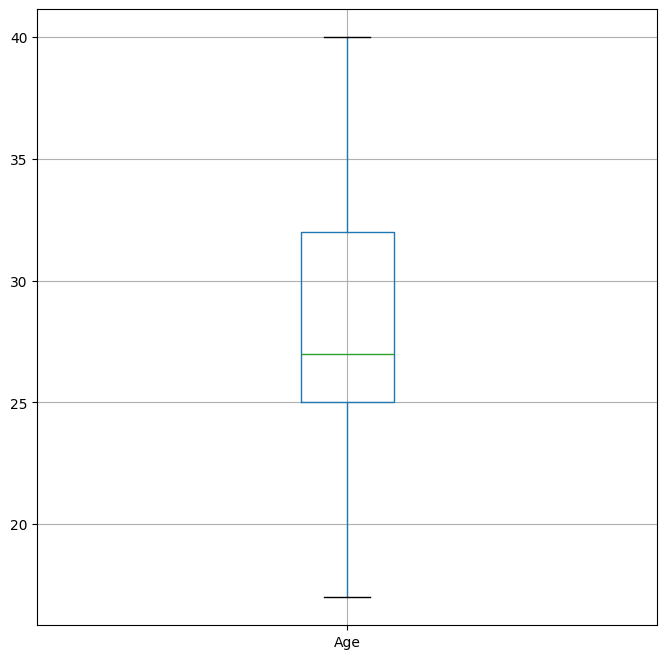

In [11]:
# mengecek keberadaan outlier
plt.figure(figsize=(8, 8))
caesarian.boxplot(figsize=(8, 8))
plt.show()

Tidak tampak ada outlier pada data.

### Menentukan *Independent Variable* dan *Dependent Variable*

Pada langkah ini, kita akan menentukan variabel independen (fitur) dan variabel dependen (target). Variabel dependen adalah variabel yang akan diprediksi, sedangkan variabel independen adalah variabel yang digunakan untuk membuat prediksi. Pada dataset ini, variabel **caesarian** dipilih sebagai variabel dependen, sedangkan variabel lainnya menjadi variabel independen.

Karena data yang diberikan bertipe kategorikal, maka kita perlu melakukan transformasi agar data dapat diolah oleh mesin. Ada beberapa teknik transformasi yang dapat dilakukan, diantaranya:
- One-hot encoding
- Label encoding
- Target encoding
- dan lain-lain. (Dapat dibaca slide kuliah Feature Engineering)

Teknik-teknik transformasi, memiliki kelebihan dan kelemahannya masing-masing (teman-teman mungkin bisa membacanya di internet terkait tujuan dari setiap teknik). Pada kasus ini, kita akan menggunakan **label encoding** karena teknik ini memastikan bahwa data kategorikal yang memiliki urutan (ordinal) dapat diproses dengan baik. Label encoding mengubah setiap kategori menjadi nilai numerik yang sesuai dengan urutan atau hierarki kategori tersebut.

**Catatan:**<br>
Pemilihan teknik transformasi sangat bergantung pada karakteristik data dan tujuan analisis. Pastikan untuk memilih teknik yang sesuai dengan data.

In [12]:

# Mapping untuk kolom Delivery No
delivery_mapping = {
	'Timely': 0,
	'Premature': 1,
	'Latecomer': 2
}

# Mapping untuk kolom Blood of Pressure
blood_pressure_mapping = {
	'Low': 0,
	'Normal': 1,
	'High': 2
}

# Mapping untuk kolom Heart Problem
heart_problem_mapping = {
	'apt': 0,
	'inept': 1
}

# Mapping untuk kolom Caesarian
caesarian_mapping = {
	'No': 0,
	'Yes': 1
}

caesarian_encoded = caesarian.copy()
caesarian_encoded['Delivery No'] = caesarian['Delivery No'].map(delivery_mapping)
caesarian_encoded['Blood of Pressure'] = caesarian['Blood of Pressure'].map(blood_pressure_mapping)
caesarian_encoded['Heart Problem'] = caesarian['Heart Problem'].map(heart_problem_mapping)
caesarian_encoded['Caesarian'] = caesarian['Caesarian'].map(caesarian_mapping)

caesarian_encoded.head()

,Age,Delivery No,Blood of Pressure,Heart Problem,Caesarian
0,22,0,2,0,0
1,26,0,1,0,1
2,26,1,1,0,0
3,28,0,2,0,0
4,22,0,1,0,1


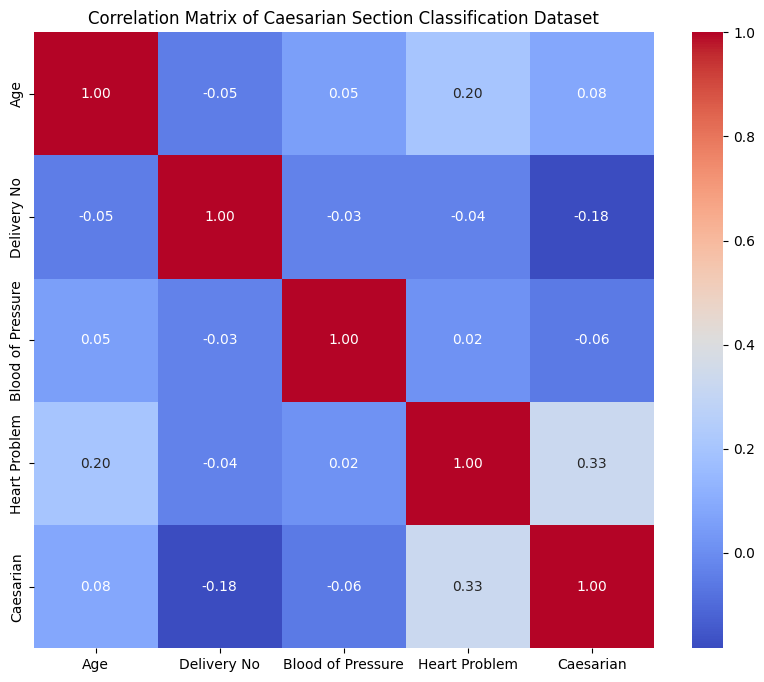

In [13]:
# Calculate the correlation matrix
correlation_matrix = caesarian_encoded.corr(method='pearson')

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Caesarian Section Classification Dataset')
plt.show()

> Dapat dilihat bahwa korelasi setiap fitur terhadap target menunjukkan angka yang rendah. Hal ini sesuai dengan asumsi dalam Naive Bayes, yaitu setiap fitur independen secara kondisional jika label kelas diketahui.

In [14]:
# Variabel independen

X = caesarian_encoded.drop(["Caesarian", "Age"], axis = 1)
X.head()

,Delivery No,Blood of Pressure,Heart Problem
0,0,2,0
1,0,1,0
2,1,1,0
3,0,2,0
4,0,1,0


Kita drop kolom `Age` karena sebagian besar fitur lain merupakan fitur kategorikal sehingga kita akan menggunakan Categorical Naive Bayes.

In [15]:
# Variabel dependen

y = caesarian_encoded["Caesarian"]
y.head()

0    0
1    1
2    0
3    0
4    1
Name: Caesarian, dtype: int64

### *Classification*

Klasifikasi menggunakan Naive Bayes dapat dilakukan dengan memanfaatkan package `sklearn`. Dalam proses ini, kita membutuhkan data training dan data testing. Kita akan mengambil **20%** dari data sebagai data testing dan sisanya akan menjadi data training. Berikut adalah kode program untuk membagi data menjadi data training dan testing:

In [16]:
# Melakukan splitting terhadap data train dan test (0.2 test_size)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

Selanjutnya, kita akan melakukan cross-validation dengan `n_splits=5`. Cross-validation digunakan untuk membagi dataset menjadi beberapa bagian (*fold*). Strategi ini membantu menghasilkan model yang lebih stabil performanya dan menghindari overfitting.

In [17]:
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

Setelah itu, kita akan mengaktifkan fungsi klasifikasi Naive Bayes, mengevaluasi hasil cross-validation, dan melatih model menggunakan data training.

In [18]:
# Mengaktifkan/memanggil/membuat fungsi klasifikasi Naive Bayes
modelnb = CategoricalNB()

In [19]:
# Melakukan evaluasi cross-validation
scores = cross_val_score(modelnb, X_train, y_train, cv=kfold)

In [20]:
# Menampilkan skor dari setiap fold
print("Cross-validation scores:", scores)
print("Mean accuracy:", np.mean(scores))

Cross-validation scores: [0.75       0.58333333 0.63636364 0.63636364 0.45454545]
Mean accuracy: 0.6121212121212121


Dari hasil cross-validation, terlihat bahwa skor akurasi bervariasi di setiap fold, dengan rata-rata 0.612.

Selanjutnya, kita akan melatih model menggunakan data training dan melakukan prediksi pada data testing.

In [21]:
# Memasukkan data training pada fungsi klasifikasi Naive Bayes
modelnb.fit(X_train, y_train)

CategoricalNB()

Langkah selanjutnya yang akan kita lakukan adalah menentukan hasil prediksi dari x_test.

In [22]:
# Prediksi data test

y_pred = modelnb.predict(X_test)
print("Hasil prediksi:", y_pred)

Hasil prediksi: [0 1 1 1 1 1 0 0 0 1 1 1 0 1 1]


Output kode program y_pred adalah hasil prediksi operasi caesar. Kemudian, hasil tersebut akan kita bandingkan dengan data aktualnya, yaitu y_test dengan menggunakan kode program berikut ini.

In [23]:
# Array data test
print("Actual:", np.array(y_test))

Actual: [1 1 1 0 0 1 0 0 0 1 1 1 1 1 0]


### *Classification Report*

Setelah model dilatih dan diuji, kita perlu mengevaluasi performanya. Beberapa metrik yang digunakan adalah **accuracy**, **precision**, **recall**, dan **f1-score**. Selain itu, kita juga akan menampilkan confusion matrix untuk melihat ketepatan prediksi secara detail.

In [24]:
def evaluate_classifier_performance(prediction, y_test):

    # Informasi evaluasi secara compact
    print("Hasil Evaluasi berdasarkan classification report:\n")
    print(classification_report(y_test, prediction, zero_division=0))
    print()

    # Confusion Matrix
    print("Confusion Matrix:")
    y_actual = pd.Series(np.array(y_test), name="actual")
    y_pred = pd.Series(np.array(prediction), name="prediction")
    df_confusion = pd.crosstab(y_actual, y_pred)
    display(df_confusion)
    print()

    # Informasi lengkap
    print("Butuh informasi lebih lengkap? Silakan simak di bawah ini:")
    print('Accuracy:', accuracy_score(y_test, prediction))
    print('F1 Macro Average:', f1_score(y_test, prediction, average='macro'))
    print('F1 Micro Average:', f1_score(y_test, prediction, average='micro'))
    print('Precision Macro Average:', precision_score(y_test, prediction, average='macro', zero_division=0))
    print('Precision Micro Average:', precision_score(y_test, prediction, average='micro', zero_division=0))
    print('Recall Macro Average:', recall_score(y_test, prediction, average='macro', zero_division=0))
    print('Recall Micro Average:', recall_score(y_test, prediction, average='micro', zero_division=0))

In [25]:
evaluate_classifier_performance(y_pred, y_test)

Hasil Evaluasi berdasarkan classification report:

              precision    recall  f1-score   support

           0       0.60      0.50      0.55         6
           1       0.70      0.78      0.74         9

    accuracy                           0.67        15
   macro avg       0.65      0.64      0.64        15
weighted avg       0.66      0.67      0.66        15


Confusion Matrix:


prediction,0,1
actual,,
0,3,3
1,2,7



Butuh informasi lebih lengkap? Silakan simak di bawah ini:
Accuracy: 0.6666666666666666
F1 Macro Average: 0.6411483253588517
F1 Micro Average: 0.6666666666666666
Precision Macro Average: 0.6499999999999999
Precision Micro Average: 0.6666666666666666
Recall Macro Average: 0.6388888888888888
Recall Micro Average: 0.6666666666666666


Berdasarkan hasil evaluasi, performa model tidak terlalu baik. Hal ini terlihat dari nilai **accuracy** dan metrik lainnya yang rendah. Beberapa kemungkinan penyebabnya adalah:
1. Dataset yang Tidak Seimbang<br>
Perbandingan jumlah tiap kelas dalam dataset tidak seimbang, menyebabkan model cenderung bias terhadap kelas yang lebih dominan.
2. Pemilihan Algoritma yang Kurang Sesuai <br>
Algoritma Naive Bayes mungkin tidak cocok untuk karakteristik data yang dimiliki. Beberapa algoritma hanya bekerja optimal pada distribusi data tertentu.

### <b>Pendekatan Lain</b>
Pendekatan yang lebih kompleks dalam menerapkan Naive Bayes adalah dengan memisahkan fitur numerik dan kategorik, lalu melatih dua model Naive Bayes yang berbeda sesuai dengan jenis datanya. Gaussian Naive Bayes untuk fitur numerik dan Categorical Naive Bayes untuk fitur kategorik. Setelah kedua model dilatih, hasil prediksi probabilitasnya dapat digabungkan dengan mengalikan nilai probabilitas dari masing-masing model, dengan asumsi bahwa fitur-fitur tersebut bersifat independen. Strategi ini memungkinkan pemrosesan data yang lebih sesuai dengan karakteristiknya masing-masing sehingga mahasiswa dapat bereksperimen dan mengevaluasi efektivitas pendekatan ini dalam meningkatkan performa klasifikasi.

# **KNN (K-Nearest Neighbor)**
---

## A. Pengenalan KNN

Sesuai dengan namanya (*nearest neighbors*), algoritma KNN mengklasifikasikan suatu data baru dengan melihat kedekatan data tersebut terhadap data lama yang telah ada. Contohnya, jika Anda memiliki dataset yang berisi informasi rumah dengan label **rumah mewah** dan **rumah tidak mewah**, KNN akan menyimpan informasi mengenai kemiripan fitur-fitur seperti luas rumah dan harga rumah. Ketika data rumah baru dimasukkan, KNN akan mengecek kesamaan fitur-fitur tersebut terhadap data lama yang telah dipelajari. Hasil pengecekan ini akan digunakan untuk menentukan klasifikasi rumah baru tersebut.

## B. Pengenalan KNN Dalam Scikit-learn

Pada library `scikit-learn`, terdapat beberapa parameter penting yang perlu diperhatikan saat mengimplementasikan algoritma KNN. Berikut adalah rangkuman singkatnya:

* `n_neighbors`  
	* Merepresentasikan jumlah **K** (tetangga terdekat) yang digunakan untuk menentukan klasifikasi. Nilai *default*: 5.
* `algorithm`  
	* Merepresentasikan algoritma yang digunakan untuk mencari tetangga terdekat.
	* Pilihan algoritma: `auto` (*default*), `ball_tree`, `kd_tree`, dan `brute`.
* `p`  
	* Merepresentasikan parameter untuk rumus jarak Minkowski.
	* Jika `p=1`, rumus jarak yang digunakan adalah Manhattan Distance.
	* Jika `p=2`, rumus jarak yang digunakan adalah Euclidean Distance (*default*).
* `metric`  
	* Merepresentasikan rumus jarak yang digunakan untuk menghitung kedekatan antara data point. Nilai *default*: `minkowski`.
	* Beberapa opsi rumus jarak yang tersedia: `euclidean`, `manhattan`, `cosine`, `jaccard`, `hamming`, dll.
	* Dokumentasi mengenai rumus jarak yang dapat digunakan dapat diakses di [sini](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.pairwise.distance_metrics.html#sklearn.metrics.pairwise.distance_metrics).

> Referensi: https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

Kita perlu memperhatikan rumus jarak yang digunakan dan juga jumlah K yang optimal. Strategi yang dapat diterapkan untuk mencari nilai K yang optimal adalah dengan **cross-validation**. Sedangkan untuk metric beserta parameternya bisa dipilih berdasarkan sifat data. Jika semua data numerik, kita bisa memilih untuk menggunakan **Euclidean** atau **Manhattan** distance. Jika semua data kategorikal, kita bisa menggunakan **Jaccard** distance.

Permasalahan yang sering ditemukan saat mengimplementasikan KNN adalah ketika variabel independen terdiri dari data **kategorikal** dan **numerik**. Banyak praktisi yang meyakini untuk menggunakan algoritma lain jika menemui masalah tersebut, seperti menggunakan algoritma **decision tree**, **random forest**, **neural network**, **deep learning**, dan lain-lain.

## C. *Hands-on* KNN

Selanjutnya, kita akan mencoba mengimplementasikan KNN untuk mengklasifikasikan jenis kaca yang harus digunakan berdasarkan dataset `glass_classification.csv` yang diambil dari [Glass Identification Data Set](https://www.kaggle.com/datasets/danushkumarv/glass-identification-data-set) dengan beberapa modifikasi.

Berikut adalah informasi dari dataset di atas:
- `RI`: Refractive Index
- `Na`: Sodium (unit measurement: weight percent in the corresponding oxide, as are attributes 4-10)
- `Mg`: Magnesium
- `Al`: Aluminum
- `Si`: Silicon
- `K`: Potassium
- `Ca`: Calcium
- `Ba`: Barium
- `Fe`: Iron
- `type`: Type of glass


### *Import Dataset*

In [26]:
glass = pd.read_csv("glass_classification.csv").drop("Id", axis=1)
# glass = pd.read_csv("https://drive.google.com/uc?export=download&id=1OrumHSve0SHbb_XW-8slp12BT9U9jPMu").drop("Id", axis=1)
glass.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [27]:
print("----Informasi Baris dan Kolom----")
print("Baris : ", glass.shape[0])
print("Kolom : ", glass.shape[1])

----Informasi Baris dan Kolom----
Baris :  214
Kolom :  10


### *Preprocessing*

In [28]:
cek_null(glass)

Tidak ditemukan missing value pada dataset


In [29]:
# mengecek jumlah duplikasi pada data
print("Jumlah duplikasi data: " + str(glass.duplicated().sum()))

Jumlah duplikasi data: 1


In [30]:
glass.drop_duplicates(inplace=True)
print("Jumlah duplikasi data: " + str(glass.duplicated().sum()))

Jumlah duplikasi data: 0


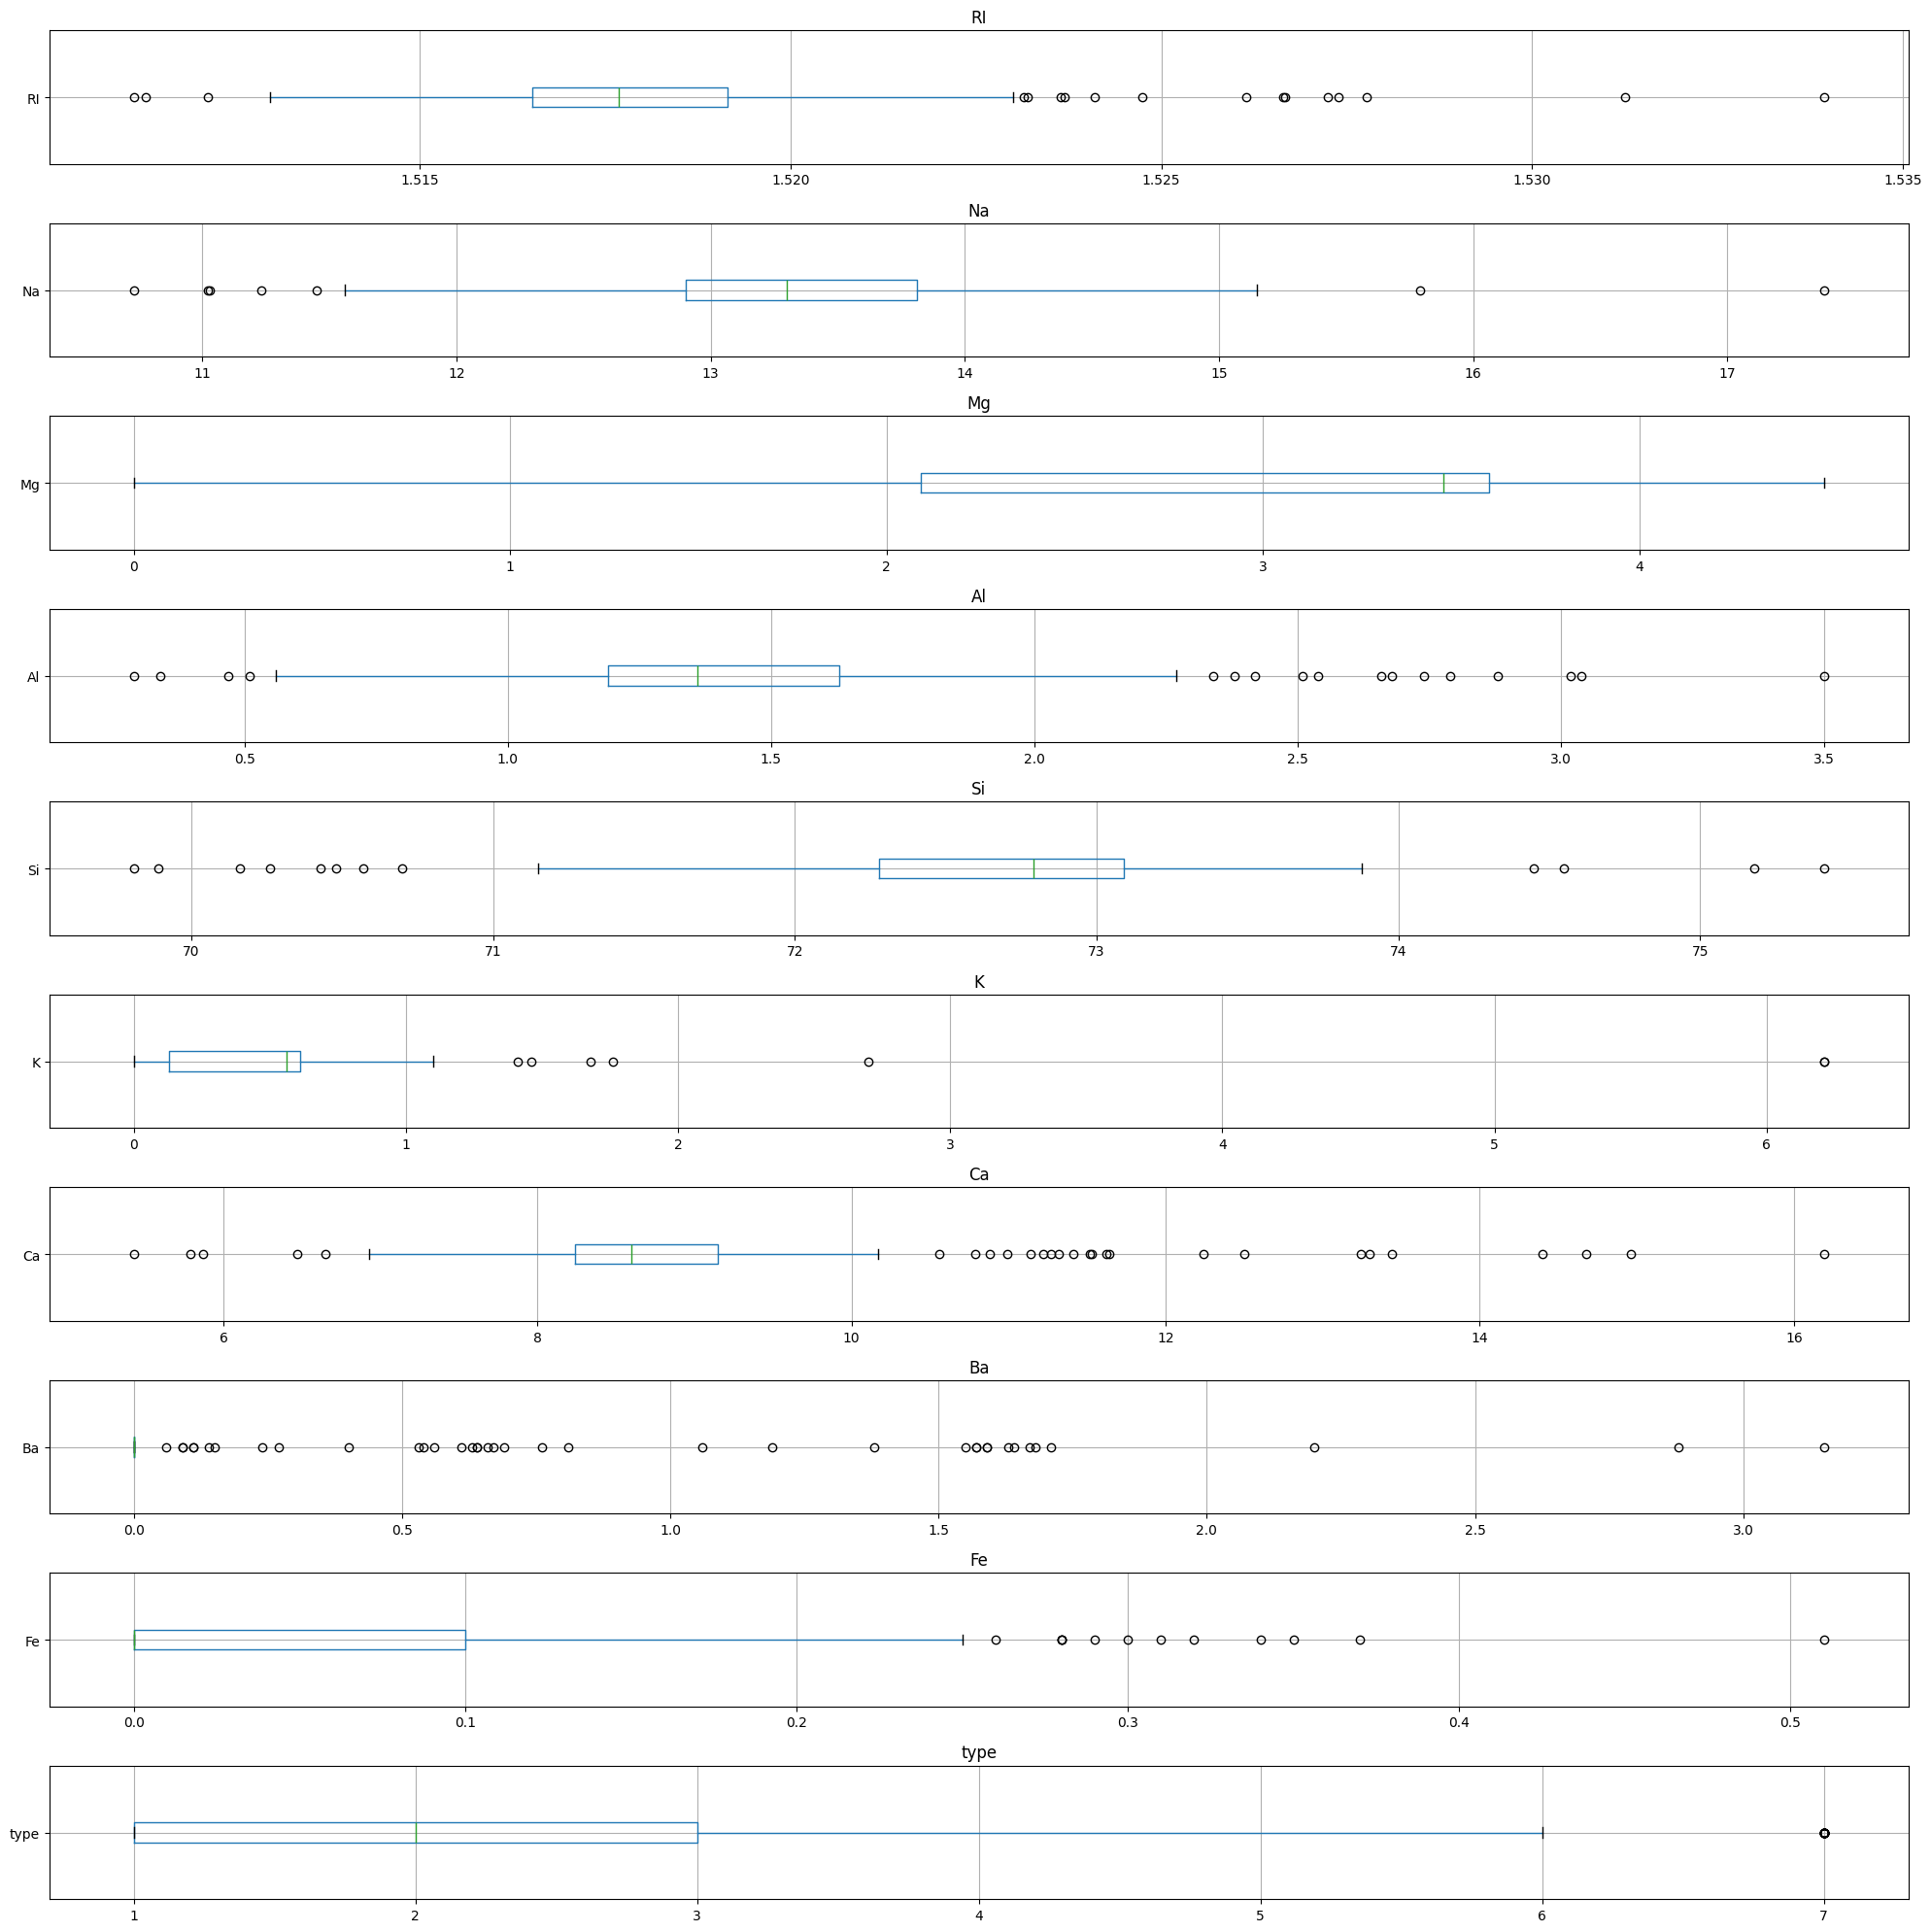

In [31]:
# mengecek keberadaan outlier

# Outliers
plt.figure(figsize=(20, 20))
numerical_columns = glass.select_dtypes(include=['float64', 'int64']).columns
for i, column in enumerate(numerical_columns, 1):
	plt.subplot(len(numerical_columns), 1, i)
	glass.boxplot(column=column, vert=False)
	plt.title(column)
plt.tight_layout()
plt.show()

Pada boxplot di atas, terlihat bahwa jumlah outlier tidak terlalu banyak. Data juga cenderung normal, sehingga tidak perlu penanganan lebih lanjut terhadap outlier.

In [32]:
def check_outlier(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)

    # Menghitung RUB dan RLB.
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR

    # Menampilkan banyaknya outlier pada atribut.
    outliers = (df < lower_limit) | (df > upper_limit)
    print ("Outlier pada tiap atribut:")
    print(outliers.sum())

    return outliers

In [33]:
outliers = dict(check_outlier(glass).sum())

Outlier pada tiap atribut:
RI      17
Na       7
Mg       0
Al      17
Si      12
K        7
Ca      27
Ba      38
Fe      12
type    29
dtype: int64


Untuk kemudahan implementasi kita berasumsi bahwa *acceptance threshold* untuk outlier yang kita maklumi adalah 17 sehingga kita akan membuang kolom dengan jumlah outlier >= 17

In [34]:
drop_col = [key for key, val in outliers.items() if val >= 17]
drop_col.remove('type')
drop_col

['RI', 'Al', 'Ca', 'Ba']

In [35]:
glass = glass.drop(columns=drop_col)
glass.head()

,Na,Mg,Si,K,Fe,type
0,13.64,4.49,71.78,0.06,0.0,1
1,13.89,3.60,72.73,0.48,0.0,1
2,13.53,3.55,72.99,0.39,0.0,1
3,13.21,3.69,72.61,0.57,0.0,1
4,13.27,3.62,73.08,0.55,0.0,1


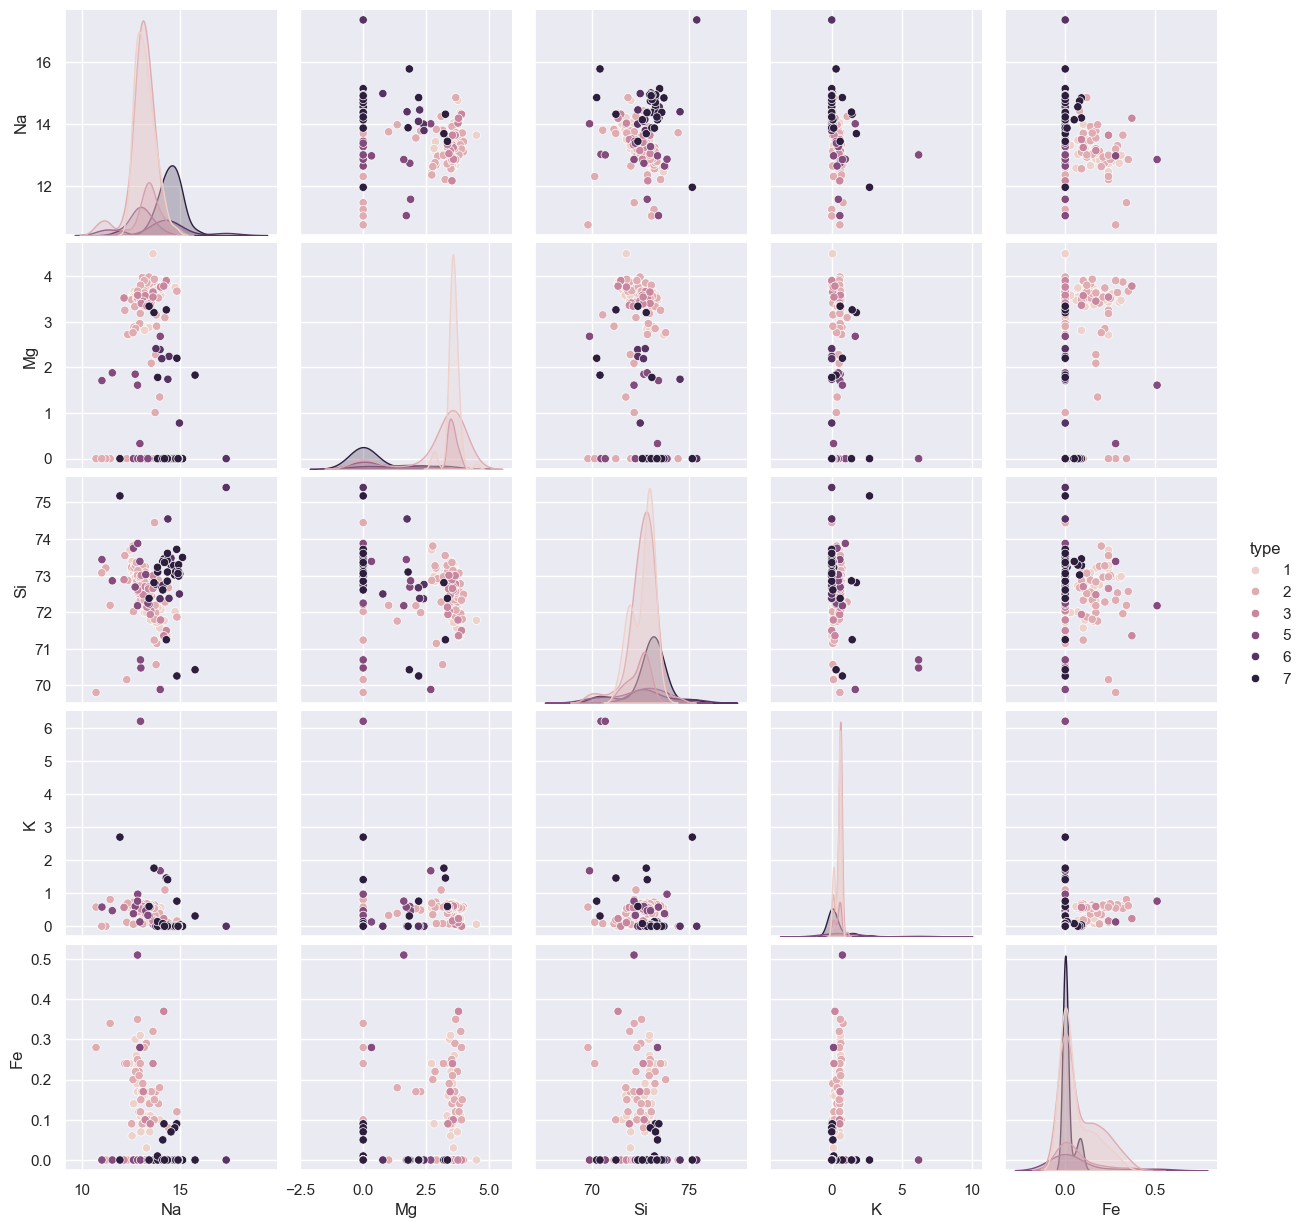

In [36]:
sns.set()
sns.pairplot(glass, hue ='type')
plt.show()

Berdasarkan plot diatas, terlihat bahwa distribusi nilai pada semua jenis obat hampir mendekati normal. Walaupun ada beberapa yang terlihat seperti bimodal, masih tetap bisa ditoleransi.

### Menentukan *Independent Variable* dan *Dependent Variable*

Dalam kasus ini, target prediksi kita adalah **type**, sehingga variabel **type** akan menjadi variabel dependen (target), sedangkan variabel lainnya akan menjadi variabel independen (fitur). Sebelum menentukan fitur yang akan digunakan dalam model, kita perlu melakukan ***feature selection*** untuk memilih variabel-variabel terbaik yang paling berpengaruh terhadap target.

> Dalam tahap ini, kita belum membahas secara mendalam mengenai feature selection atau feature engineering. Sementara itu, mahasiswa dapat mengikuti langkah-langkah yang diberikan pada lab

Karena data fitur kita bersifat numerik atau kontinu, dan data target kita kategorik, maka kita akan memilih strategi **ANOVA** atau *analysis of variance* dalam melakukan feature selection. Berikut adalah contohnya.

> Referensi: <br>
> https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html#sklearn.feature_selection.SelectKBest

In [37]:
X_raw = glass.drop(["type"],axis=1)
y = glass["type"]

Kita akan memilih tiga variabel terbaik dari variabel independen (`X_raw`) untuk dilatih pada model. Berikut adalah contoh kodenya.

In [38]:
selector = SelectKBest(f_classif, k=3)
X = selector.fit_transform(X_raw, y)

*Note*: <br>
Perhatikan, pemilihan fitur harus dilakukan secara terus menerus atau berulang dengan memperbaiki tahap sebelumnya. Jika teman-teman ingin mendapatkan model terbaik, teman-teman harus terus melakukan tahapan ini hingga teman-teman mendapatkan model yang terbaik.

In [39]:
print("Jumlah feature (sebelum dilakukan feature selection ) :", X_raw.shape[1])
print("Jumlah feature (setelah dilakukan feature selection ) :", X.shape[1])

Jumlah feature (sebelum dilakukan feature selection ) : 5
Jumlah feature (setelah dilakukan feature selection ) : 3


In [40]:
input_features = selector.feature_names_in_
selector.get_feature_names_out(input_features=input_features)

array(['Na', 'Mg', 'K'], dtype=object)

Dari hasil feature selection yang ada kita akan mengambil tiga fitur yaitu `Na`, `Mg`, dan `K`. Selanjutnya, kita akan melakukan *splitting data* yaitu membagi dataset menjadi *testing* dan *training* dengan ukuran yang sama seperti pada proses Naive Bayes. Berikut adalah caranya:

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify=y, random_state = 42)

*Note*:<br>
`stratify=y` digunakan untuk memastikan proporsi kelas pada data training dan testing sama dengan dataset asli. Ini digunakan untuk dataset dengan distribusi kelas yang tidak seimbang (*imbalanced*).


Sebelum menerapkan algoritma KNN, penting untuk melakukan **standarisasi** atau **normalisasi** pada nilai-nilai independent variables (fitur). Hal ini sangat krusial karena KNN menggunakan perhitungan jarak (seperti Euclidean atau Manhattan) untuk menentukan tetangga terdekat. Jika fitur memiliki rentang nilai yang berbeda-beda, fitur dengan skala yang lebih besar akan mendominasi perhitungan jarak, sehingga mengganggu performa model.

Pada tahapan ini, kita akan memilih menggunakan normalisasi, berikut adalah caranya.

In [42]:
scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### *Classification*

In [43]:
# Mengatur jumlah neighbor yang digunakan.
N_NEIGHBORS = 4

# Mengatur jumlah pelatihan pada fold fold yang ada.
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

Anda dapat memilih rumus perhitungan jarak yang ingin digunakan dengan menambahkan parameter `metric` pada saat pembuatan model KNN. Secara *default*, jika tidak ditambahkan, nilai parameter tersebut adalah `minkowski`.

#### KNN dengan *Euclidian Distance*

In [44]:
KNN_euclidean = KNeighborsClassifier(n_neighbors=N_NEIGHBORS, metric='euclidean')
KNN_euclidean.fit(X_train_scaled, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=4)

In [45]:
scores = cross_val_score(KNN_euclidean, X_train_scaled, y_train, scoring='accuracy', cv=kfold)
print(f'Hasil Evaluasi cross validation: {scores.mean()}')

Hasil Evaluasi cross validation: 0.5882352941176471


In [46]:
y_pred = KNN_euclidean.predict(X_test_scaled)
print("Hasil prediksi:", y_pred)

Hasil prediksi: [7 5 1 5 2 1 2 2 1 2 3 1 7 6 1 7 7 1 1 5 1 1 7 2 1 1 7 7 2 1 1 1 1 1 1 1 1
 2 1 1 1 2 6]


In [47]:
evaluate_classifier_performance(y_pred, y_test)

Hasil Evaluasi berdasarkan classification report:

              precision    recall  f1-score   support

           1       0.50      0.79      0.61        14
           2       0.62      0.33      0.43        15
           3       1.00      0.33      0.50         3
           5       1.00      1.00      1.00         3
           6       1.00      1.00      1.00         2
           7       0.71      0.83      0.77         6

    accuracy                           0.63        43
   macro avg       0.81      0.71      0.72        43
weighted avg       0.67      0.63      0.61        43


Confusion Matrix:


prediction,1,2,3,5,6,7
actual,,,,,,
1,11,3,0,0,0,0
2,8,5,0,0,0,2
3,2,0,1,0,0,0
5,0,0,0,3,0,0
6,0,0,0,0,2,0
7,1,0,0,0,0,5



Butuh informasi lebih lengkap? Silakan simak di bawah ini:
Accuracy: 0.627906976744186
F1 Macro Average: 0.7191874148395887
F1 Micro Average: 0.627906976744186
Precision Macro Average: 0.8065476190476191
Precision Micro Average: 0.627906976744186
Recall Macro Average: 0.7142857142857143
Recall Micro Average: 0.627906976744186


#### KNN dengan *Manhattan Distance*

In [48]:
KNN_manhattan = KNeighborsClassifier(n_neighbors=N_NEIGHBORS, metric='manhattan')
KNN_manhattan.fit(X_train_scaled, y_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=4)

In [49]:
scores = cross_val_score(KNN_manhattan, X_train_scaled, y_train, scoring='accuracy', cv=kfold)
print(f'Hasil Evaluasi cross validation: {scores.mean()}')

Hasil Evaluasi cross validation: 0.6294117647058824


In [50]:
y_pred = KNN_manhattan.predict(X_test_scaled)
print("Hasil prediksi:", y_pred)

Hasil prediksi: [7 5 1 5 2 1 1 2 1 1 3 1 7 6 1 7 7 1 1 5 1 1 7 2 1 1 7 7 2 1 7 1 1 1 1 1 1
 2 1 1 1 2 6]


In [51]:
evaluate_classifier_performance(y_pred, y_test)

Hasil Evaluasi berdasarkan classification report:

              precision    recall  f1-score   support

           1       0.52      0.86      0.65        14
           2       0.67      0.27      0.38        15
           3       1.00      0.33      0.50         3
           5       1.00      1.00      1.00         3
           6       1.00      1.00      1.00         2
           7       0.75      1.00      0.86         6

    accuracy                           0.65        43
   macro avg       0.82      0.74      0.73        43
weighted avg       0.69      0.65      0.61        43


Confusion Matrix:


prediction,1,2,3,5,6,7
actual,,,,,,
1,12,2,0,0,0,0
2,9,4,0,0,0,2
3,2,0,1,0,0,0
5,0,0,0,3,0,0
6,0,0,0,0,2,0
7,0,0,0,0,0,6



Butuh informasi lebih lengkap? Silakan simak di bawah ini:
Accuracy: 0.6511627906976745
F1 Macro Average: 0.731123981123981
F1 Micro Average: 0.6511627906976745
Precision Macro Average: 0.8230676328502415
Precision Micro Average: 0.6511627906976745
Recall Macro Average: 0.7428571428571429
Recall Micro Average: 0.6511627906976745


#### KNN dengan *Jaccard Similarity*

In [52]:
KNN_jaccard = KNeighborsClassifier(n_neighbors=N_NEIGHBORS, metric='jaccard')
KNN_jaccard.fit(X_train_scaled, y_train)

KNeighborsClassifier(metric='jaccard', n_neighbors=4)

In [53]:
scores = cross_val_score(KNN_jaccard, X_train_scaled, y_train, scoring='accuracy', cv=kfold)
print(f'Hasil Evaluasi cross validation: {scores.mean()}')

Hasil Evaluasi cross validation: 0.5


In [54]:
y_pred = KNN_jaccard.predict(X_test_scaled)
print("Hasil prediksi:", y_pred)

Hasil prediksi: [7 2 1 2 1 1 1 1 1 1 1 1 2 6 1 2 7 1 1 2 1 1 7 1 1 1 2 7 1 1 1 1 1 1 1 1 1
 1 1 1 1 7 6]


In [55]:
evaluate_classifier_performance(y_pred, y_test)

Hasil Evaluasi berdasarkan classification report:

              precision    recall  f1-score   support

           1       0.47      1.00      0.64        14
           2       0.17      0.07      0.10        15
           3       0.00      0.00      0.00         3
           5       0.00      0.00      0.00         3
           6       1.00      1.00      1.00         2
           7       0.60      0.50      0.55         6

    accuracy                           0.47        43
   macro avg       0.37      0.43      0.38        43
weighted avg       0.34      0.47      0.36        43


Confusion Matrix:


prediction,1,2,6,7
actual,,,,
1,14,0,0,0
2,12,1,0,2
3,3,0,0,0
5,0,3,0,0
6,0,0,2,0
7,1,2,0,3



Butuh informasi lebih lengkap? Silakan simak di bawah ini:
Accuracy: 0.46511627906976744
F1 Macro Average: 0.3795093795093795
F1 Micro Average: 0.46511627906976744
Precision Macro Average: 0.37222222222222223
Precision Micro Average: 0.46511627906976744
Recall Macro Average: 0.42777777777777776
Recall Micro Average: 0.46511627906976744


Berdasarkan hasil evaluasi beberapa model di atas, terlihat bahwa model menghasilkan performa yang kurang optimal saat menggunakan metrik `Jaccard`. Hal ini terjadi karena metrik Jaccard umumnya digunakan untuk menghitung kesamaan (*similarity*) atau ketidaksamaan (*dissimilarity*) antara fitur-fitur yang bersifat biner atau kategorikal. Sementara itu, semua fitur dalam dataset kita sudah dalam bentuk numerik. Akibatnya, metrik Jaccard tidak cocok untuk menghitung jarak antara atribut-atribut numerik, sehingga berdampak pada kinerja model yang dihasilkan menjadi kurang baik.

### Hyperparameter Tuning

Seperti yang sudah dikatakan sebelumnya, dalam memilih nilai K yang terbaik kita perlu melakukan cross validation. Kita akan melakukan hal ini dengan hyperparameter tuning menggunakan bantuan grid search cv. Scoring yang akan kita gunakan pada fase tuning adalah accuracy, artinya adalah kita akan mengambil parameter terbaik yang memberikan nilai akurasi terbaik. Berikut adalah contohnya.

In [56]:
# Optimalisasi KNN dengan GridSearchCV
model = KNeighborsClassifier()

# Parameter yang akan di-tuning
tunned_params = {
	'n_neighbors': list(range(1, 21)),
	'metric': ['euclidean', 'manhattan', 'jaccard']
}

In [57]:
print("Tuning hyperparameters model KNN\n")

clfKNN = GridSearchCV(
	model,
	tunned_params,
	scoring="accuracy",
	cv=kfold,
	verbose=2
)

# Melatih model dengan data training
clfKNN.fit(X_train_scaled, y_train)

Tuning hyperparameters model KNN

Fitting 5 folds for each of 60 candidates, totalling 300 fits
[CV] END ....................metric=euclidean, n_neighbors=1; total time=   0.0s
[CV] END ....................metric=euclidean, n_neighbors=1; total time=   0.0s
[CV] END ....................metric=euclidean, n_neighbors=1; total time=   0.0s
[CV] END ....................metric=euclidean, n_neighbors=1; total time=   0.0s
[CV] END ....................metric=euclidean, n_neighbors=1; total time=   0.0s
[CV] END ....................metric=euclidean, n_neighbors=2; total time=   0.0s
[CV] END ....................metric=euclidean, n_neighbors=2; total time=   0.0s
[CV] END ....................metric=euclidean, n_neighbors=2; total time=   0.0s
[CV] END ....................metric=euclidean, n_neighbors=2; total time=   0.0s
[CV] END ....................metric=euclidean, n_neighbors=2; total time=   0.0s
[CV] END ....................metric=euclidean, n_neighbors=3; total time=   0.0s
[CV] END ....

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan', 'jaccard'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20]},
             scoring='accuracy', verbose=2)

In [58]:
# Menampilkan parameter terbaik
print("\nBest parameters set found on development set:")
print(clfKNN.best_params_)


Best parameters set found on development set:
{'metric': 'manhattan', 'n_neighbors': 4}


In [59]:
# Evaluasi performa model dengan data testing
print("\nDetailed classification report:")
y_true, y_pred = y_test, clfKNN.predict(X_test_scaled)
evaluate_classifier_performance(y_pred, y_true)


Detailed classification report:
Hasil Evaluasi berdasarkan classification report:

              precision    recall  f1-score   support

           1       0.52      0.86      0.65        14
           2       0.67      0.27      0.38        15
           3       1.00      0.33      0.50         3
           5       1.00      1.00      1.00         3
           6       1.00      1.00      1.00         2
           7       0.75      1.00      0.86         6

    accuracy                           0.65        43
   macro avg       0.82      0.74      0.73        43
weighted avg       0.69      0.65      0.61        43


Confusion Matrix:


prediction,1,2,3,5,6,7
actual,,,,,,
1,12,2,0,0,0,0
2,9,4,0,0,0,2
3,2,0,1,0,0,0
5,0,0,0,3,0,0
6,0,0,0,0,2,0
7,0,0,0,0,0,6



Butuh informasi lebih lengkap? Silakan simak di bawah ini:
Accuracy: 0.6511627906976745
F1 Macro Average: 0.731123981123981
F1 Micro Average: 0.6511627906976745
Precision Macro Average: 0.8230676328502415
Precision Micro Average: 0.6511627906976745
Recall Macro Average: 0.7428571428571429
Recall Micro Average: 0.6511627906976745


Berdasarkan hasil di atas, kita memperoleh bahwa nilai k yang paling optimal adalah 4 dengan metric distance `Manhattan`.

Model ini mencapai akurasi lebih dari 60%, yang menunjukkan performa yang cukup baik. Selain itu, nilai F1 Micro dan Accuracy yang di atas 60% mengindikasikan bahwa model mampu mengurangi false positive dan false negative. Namun, masih ada ruang untuk perbaikan dalam meningkatkan kualitas prediksi.

# **Latihan Soal**
---

## <b>A. Latihan Implementasi</b>

Kita akan mencoba membuat model klasifikasi untuk kasus transaction fraud, berikut adalah penjelasan tiap atribut yang digunakan pada dataset ini. Dataset ini diambil dari [Kaggle](https://www.kaggle.com/datasets/samayashar/fraud-detection-transactions-dataset) dengan modifikasi.

*Attribute Information*:
- `transaction_id`: Unique identifier for each transaction.
- `user_id`: Unique identifier for the user.
- `transaction_amount`: Amount of money involved in the transaction.
- `transaction_type`: Type of transaction (Online, In-Store, ATM, etc.).
- `account_balance`: User's current account balance before the transaction.
- `device_type`: Type of device used (Mobile, Desktop, etc.).
- `location`: Geographical location of the transaction.
- `merchant_category`: Type of merchant (Retail, Food, Travel, etc.).
- `ip_address_flag`: Whether the IP address was flagged as suspicious (0 or 1).
- `failed_transaction_count_7d`: Count of failed transactions in the past 7 days.
- `card_type`: Type of payment card used (Credit, Debit, Prepaid, etc.).
- `card_age`: Age of the card in months.
- `transaction_distance`: Distance between the user's usual location and transaction location.
- `authentication_method`: How the user authenticated (PIN, Biometric, etc.).
- `risk_score`: Fraud risk score computed for the transaction.
- `is_weekend`: Whether the transaction occurred on a weekend (0 or 1).
- `is_fraud`: Target variable (0 = Not Fraud, 1 = Fraud).

In [60]:
transaction = pd.read_csv("synthetic_fraud_dataset.csv")
# transaction = pd.read_csv("https://drive.google.com/uc?export=download&id=1qfoScqTMrbZh3iEKvJ0CM_kxNwOTnScP")
transaction.head()

,transaction_id,user_id,transaction_amount,transaction_type,account_balance,device_type,location,merchant_category,ip_address_flag,failed_transaction_count_7d,card_type,card_age,transaction_distance,authentication_method,risk_score,is_weekend,is_fraud
0,TXN_33553,USER_1834,39.79,POS,93213.17,Laptop,Sydney,Travel,0,3,Amex,65,883.17,Biometric,0.8494,0,0
1,TXN_9427,USER_7875,1.19,Bank Transfer,75725.25,Mobile,New York,Clothing,0,4,Mastercard,186,2203.36,Password,0.0959,0,1
2,TXN_199,USER_2734,28.96,Online,1588.96,Tablet,Mumbai,Restaurants,0,4,Visa,226,1909.29,Biometric,0.8400,0,1
3,TXN_12447,USER_2617,254.32,ATM Withdrawal,76807.20,Tablet,New York,Clothing,0,4,Visa,76,1311.86,OTP,0.7935,0,1
4,TXN_39489,USER_2014,NaN,POS,NaN,Mobile,NaN,Electronics,0,4,NaN,140,NaN,NaN,NaN,1,1


### **Deskripsi Soal**

Target klasifikasi kita adalah atribut `fraud`. Atribut tersebut terdiri atas nilai 1 atau 0, yang menyatakan apakah suatu transaksi adalah penipuan atau bukan.

Berikut adalah alur atau tahapan yang harus teman-teman kerjakan. Semangat!

### <b>Nomor 1</b> - <i>Preprocessing</i> [15]
Lakukan *preprocessing* pada dataset `transaction` sebelum melanjutkan ke tahap berikutnya. Untuk setiap subsoal, tuliskan juga alasan mengapa penanganan tersebut dilakukan.

In [61]:
transaction = transaction.drop('transaction_id', axis=1)

#### a. <i>Missing Values</i>
Jika ditemukan *missing values*, lakukan penanganan yang tepat sesuai dengan asumsi Anda. Berikan alasan untuk setiap kolom yang ingin di-handle.

In [62]:
cek_null(transaction)

                       Total  Percent
risk_score              1254    2.508
authentication_method   2561    5.122
transaction_distance    3254    6.508
card_type               3561    7.122
location                4754    9.508
account_balance         5061   10.122
transaction_amount      6062   12.124


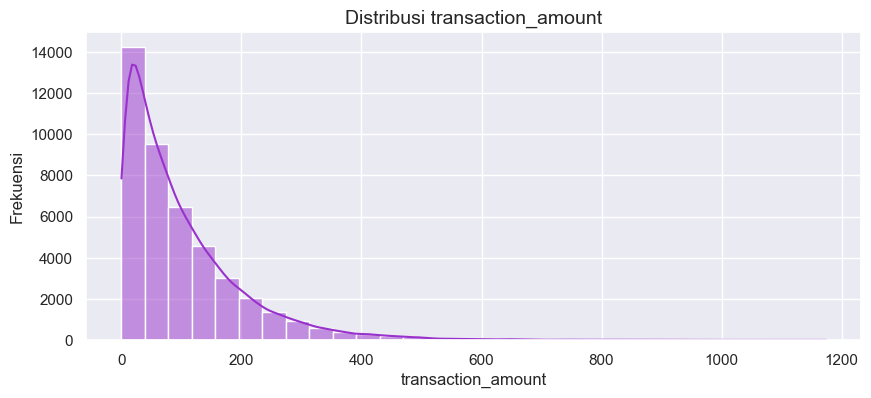

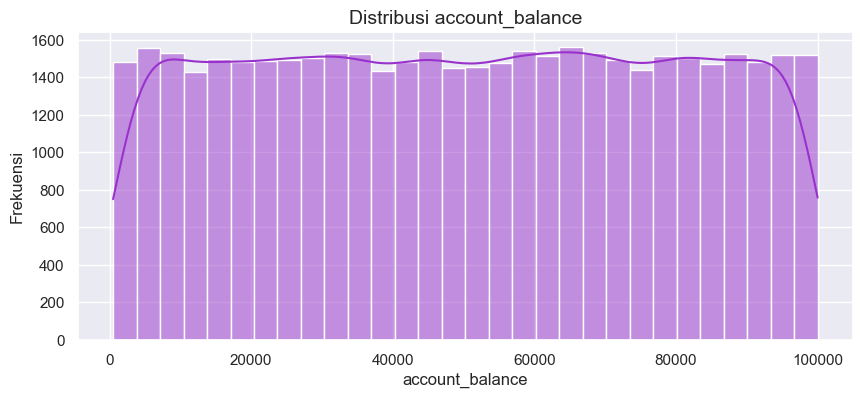

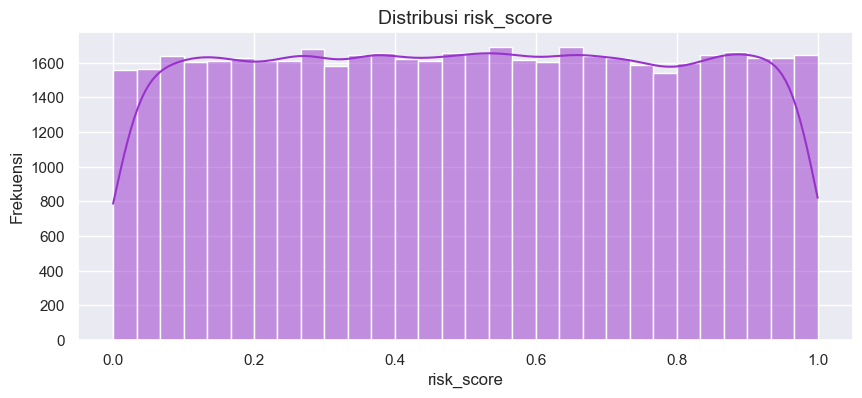

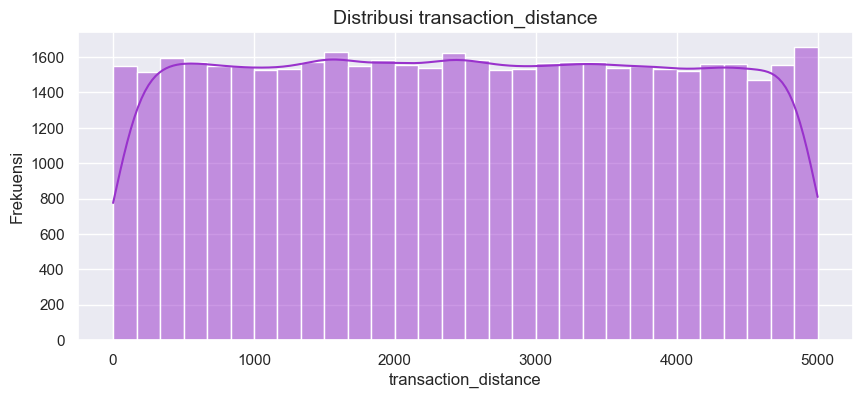

In [63]:
numeric_columns_with_null = ['transaction_amount', 'account_balance', 'risk_score', 'transaction_distance']

for col in numeric_columns_with_null:
    plt.figure(figsize=(10, 4))
    sns.histplot(transaction[col].dropna(), kde=True, bins=30, color="darkorchid")
    plt.title(f'Distribusi {col}', fontsize=14)
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Frekuensi', fontsize=12)
    plt.show()

Terlihat bahwa distribusi fitur `transaction_amount` miring ke kiri. Oleh karena itu, nilai yang hilang diisi dengan median. Sementara untuk fitur numerik lain, distribusinya relatif simetris. Nilai yang hilang pada fitur tersebut diisi dengan rerata. Sedangkan untuk fitur kategorikal, nilai yang hilang diisi dengan modus.

In [64]:
transaction['transaction_amount'] = transaction['transaction_amount'].fillna(transaction['transaction_amount'].median())
numeric_columns_with_null = transaction.select_dtypes(include='number').columns.tolist()

numeric_columns_with_null.remove('transaction_amount')
for col in numeric_columns_with_null:
    transaction[col] = transaction[col].fillna(transaction[col].mean())

categorical_columns_with_null = ['authentication_method', 'card_type', 'location', 'merchant_category']
for column in categorical_columns_with_null:
    mode_value = transaction[column].mode()[0]
    transaction[column].fillna(mode_value)

In [65]:
cek_null(transaction)

                       Total  Percent
authentication_method   2561    5.122
card_type               3561    7.122
location                4754    9.508


#### b. Nilai Duplikat
Jika ditemukan nilai duplikat, lakukan penanganan yang tepat sesuai dengan asumsi Anda.

In [66]:
print("Jumlah duplikasi data: " + str(transaction.duplicated().sum()))

Jumlah duplikasi data: 0


Karena tidak terdapat duplikasi data, maka tidak perlu penganganan duplikasi data.

#### c. <i>Outliers</i>
Jika ditemukan *outlier*, Anda bebas memilih penanganan *outlier* apa yang Anda gunakan. Dalam mencari *outlier* juga, Anda bebas menggunakan cara apapun, dengan tetap memberikan justifikasinya.

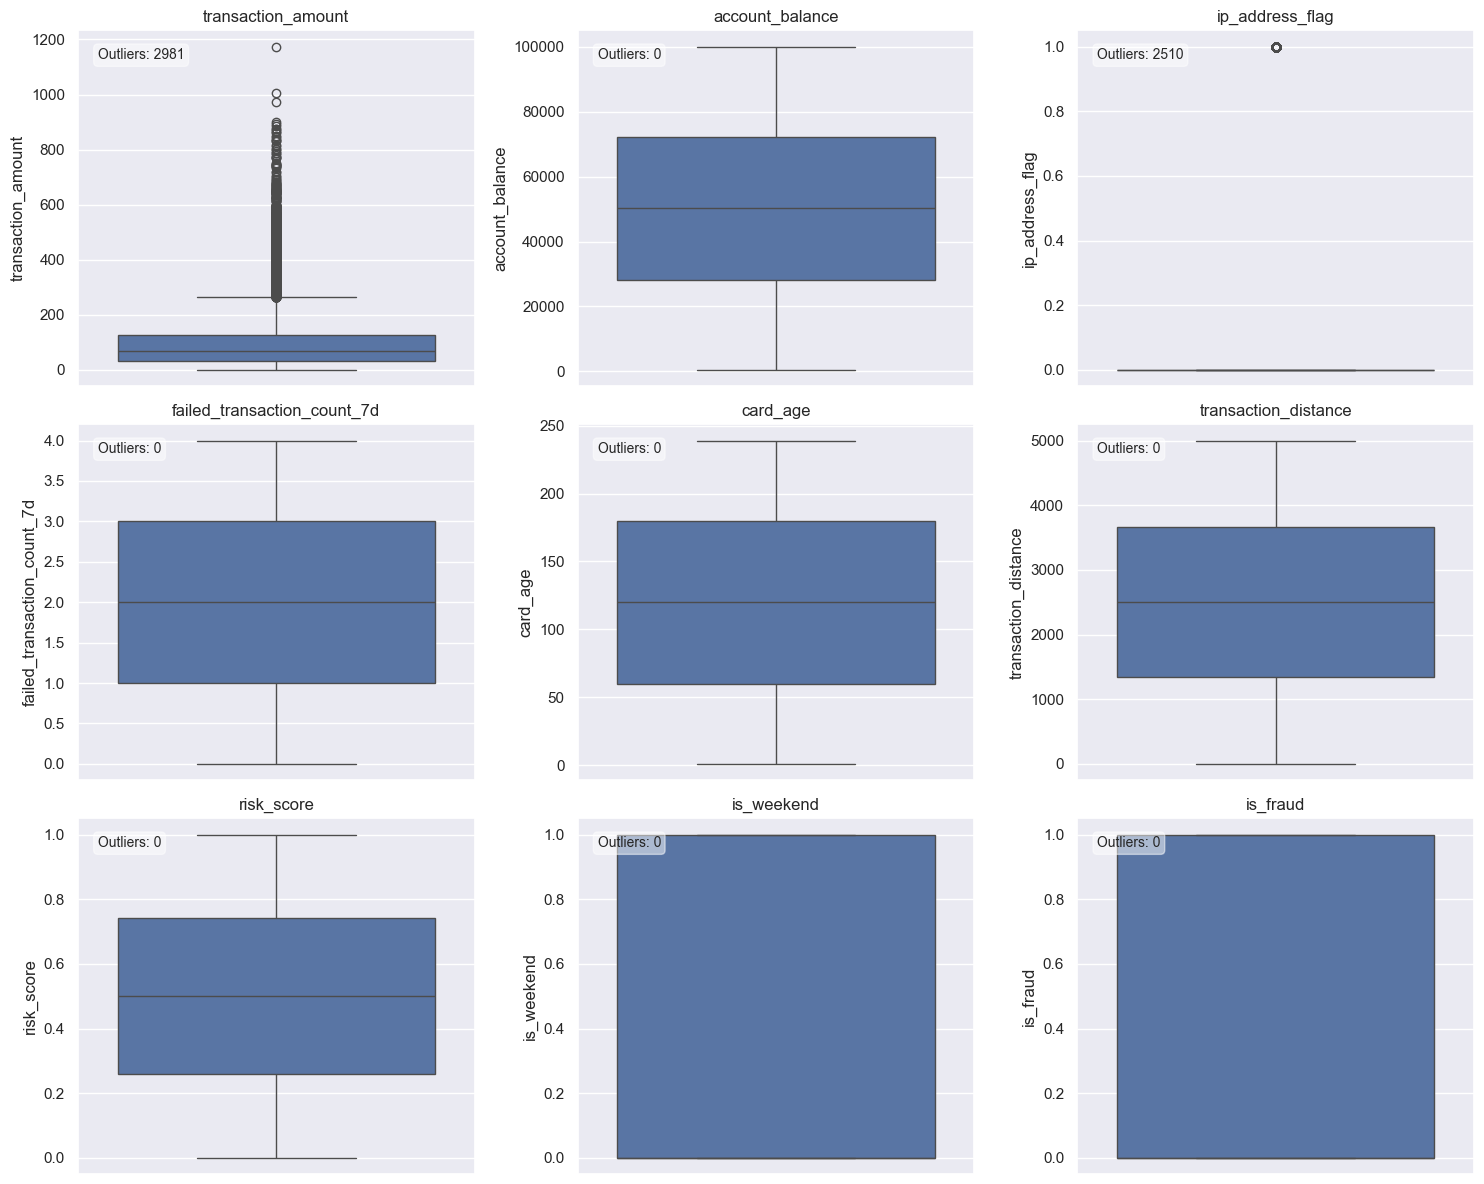

In [67]:
numeric_cols = transaction.select_dtypes(include=[np.number]).columns

n_cols = 3
n_rows = int(np.ceil(len(numeric_cols) / n_cols))

fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols*5, n_rows*4))
axes = axes.flatten()

for i, col in enumerate(numeric_cols):
    ax = axes[i]
    sns.boxplot(y=transaction[col], ax=ax)
    ax.set_title(col)

    Q1 = transaction[col].quantile(0.25)
    Q3 = transaction[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = transaction[(transaction[col] < lower_bound) | (transaction[col] > upper_bound)]
    n_outliers = outliers.shape[0]

    ax.text(0.05, 0.95, f'Outliers: {n_outliers}', transform=ax.transAxes,
            fontsize=10, verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.5))

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

Terlihat bahwa fitur `transaction_amount` memiliki *outlier* yang cukup banyak. Fitur tersebut ditransformasi dengan transformasi kuadrat untuk meminimalisasi jumlah *outlier*. Sementara itu, pada fitur `ip+address_flag`, *outlier* tidak ditangani karena fitur tersebut bernilai biner. Jika ditangani, maka dapat menghilangkan informasi penting dari fitur tersebut.

In [68]:
transaction['transaction_amount'] = np.sqrt(transaction['transaction_amount'])

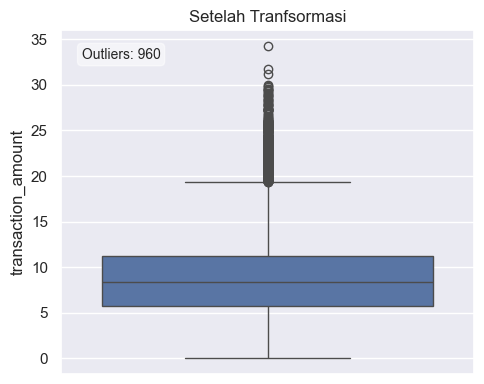

In [69]:
col = 'transaction_amount'

fig, ax = plt.subplots(figsize=(5, 4))
sns.boxplot(y=transaction[col], ax=ax)
ax.set_title(col)

Q1 = transaction[col].quantile(0.25)
Q3 = transaction[col].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = transaction[(transaction[col] < lower_bound) | (transaction[col] > upper_bound)]
n_outliers = outliers.shape[0]

ax.text(0.05, 0.95, f'Outliers: {n_outliers}', transform=ax.transAxes,
        fontsize=10, verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.5))

plt.title("Setelah Tranfsormasi")
plt.tight_layout()
plt.show()

#### d. Encoding Fitur Kategorikal

Encoding fitur yang masih berbentuk kategorikal dapat dilakukan dengan teknik apapun yang menurut Anda terbaik. Tuliskan untuk setiap fitur mengapa menggunakan encoding tersebut.

In [70]:
def target_encode(train_df, test_df, categorical_cols, target_col, k_folds=5, alpha=5, replace_original=True):
    """
    Perform target encoding on categorical features with k-fold cross-validation.

    Parameters:
    -----------
    train_df : DataFrame
        Training data
    test_df : DataFrame
        Test data
    categorical_cols : list
        List of categorical column names
    target_col : str
        Name of the target column
    k_folds : int
        Number of folds for cross-validation
    alpha : int
        Smoothing parameter
    replace_original : bool
        If True, replace original categorical columns with encoded values

    Returns:
    --------
    train_encoded : DataFrame
        Training data with encoded features
    test_encoded : DataFrame
        Test data with encoded features
    """
    # Create copies of the dataframes
    train_encoded = train_df.copy()
    test_encoded = test_df.copy() if test_df is not None else None

    # Global means for each category
    global_means = {}
    for col in categorical_cols:
        global_means[col] = train_df.groupby(col)[target_col].mean().to_dict()

    # Target encode the test set using global means
    if test_encoded is not None:
        for col in categorical_cols:
            # Create a mapping for the test set
            mapping = test_encoded[col].map(global_means[col])
            # Handle unknown categories by using the global mean
            global_target_mean = train_df[target_col].mean()
            mapping = mapping.fillna(global_target_mean)

            if replace_original:
                # Replace original column with encoded values
                test_encoded[col] = mapping
            else:
                # Create a new column for encoded values
                test_encoded[col + '_target_encoded'] = mapping

    # Prepare for k-fold encoding of training data
    kf = KFold(n_splits=k_folds, shuffle=True, random_state=42)

    # Target encode the train set using k-fold cross-validation
    for col in categorical_cols:
        # Create a temporary column for the encoded values
        temp_col = col + '_temp_encoded'
        train_encoded[temp_col] = np.nan

        # For each fold
        for train_idx, val_idx in kf.split(train_df):
            # Get out-of-fold data
            oof_train = train_df.iloc[train_idx]

            # Calculate out-of-fold means
            oof_means = oof_train.groupby(col)[target_col].agg(['mean', 'count']).reset_index()

            # Apply smoothed means to validation fold
            for _, row in oof_means.iterrows():
                category_value = row[col]
                category_mean = row['mean']
                category_count = row['count']

                # Apply smoothing
                global_mean = train_df[target_col].mean()
                smoothed_mean = (category_mean * category_count + global_mean * alpha) / (category_count + alpha)

                # Update the validation fold for this category
                train_encoded.loc[val_idx, temp_col] = np.where(
                    train_df.iloc[val_idx][col] == category_value, 
                    smoothed_mean, 
                    train_encoded.loc[val_idx, temp_col]
                )

        # For any missing categories in the validation folds, use the global mean
        train_encoded[temp_col] = train_encoded[temp_col].fillna(train_df[target_col].mean())

        if replace_original:
            # Replace original column with encoded values
            train_encoded[col] = train_encoded[temp_col]
            # Drop temporary column
            train_encoded = train_encoded.drop(temp_col, axis=1)
        else:
            # Rename temporary column to final encoded column name
            train_encoded = train_encoded.rename(columns={temp_col: col + '_target_encoded'})

    return train_encoded, test_encoded

*Encoding* menggunakan metode Target Encoding karena metode ini relatif menghasilkan dataset yang baik untuk diolah. Metode One-Hot Encoding membuat dataset dengan ukuran yang sangat besar. Di sisi lain, metode Label Encoding kurang tepat digunakan karena data kategorikal pada dataset ini tidak memiliki urutan atau hubungan ordinal.

In [71]:
categorical_columns = transaction.select_dtypes(include=['object', 'category']).columns
transaction_encoded, _ = target_encode(transaction, None, categorical_columns, "is_fraud")

transaction_encoded.head()

,user_id,transaction_amount,transaction_type,account_balance,device_type,location,merchant_category,ip_address_flag,failed_transaction_count_7d,card_type,card_age,transaction_distance,authentication_method,risk_score,is_weekend,is_fraud
0,0.160670,6.307932,0.319555,93213.170000,0.319624,0.321264,0.324175,0,3,0.323978,65,883.170000,0.317698,0.849400,0,0
1,0.178522,1.090871,0.320649,75725.250000,0.319110,0.329475,0.314891,0,4,0.317073,186,2203.360000,0.322930,0.095900,0,1
2,0.325838,5.381450,0.320383,1588.960000,0.327012,0.319129,0.323638,0,4,0.318883,226,1909.290000,0.318415,0.840000,0,1
3,0.146064,15.947414,0.327139,76807.200000,0.323910,0.323065,0.316719,0,4,0.321923,76,1311.860000,0.324571,0.793500,0,1
4,0.327882,8.347155,0.318399,50301.309072,0.317018,0.321340,0.316878,0,4,0.321340,140,2499.937219,0.321340,0.501436,1,1


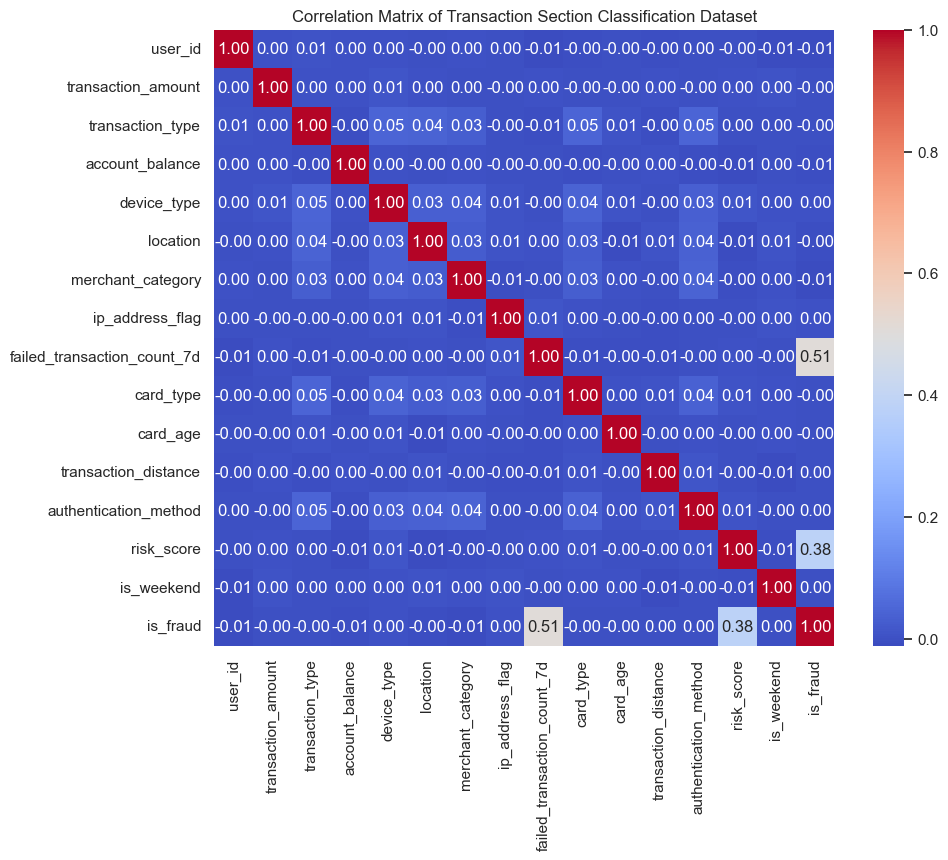

In [72]:
plt.figure(figsize=(10, 8))
sns.heatmap(transaction_encoded.corr(method='pearson'), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Transaction Section Classification Dataset')
plt.show()

Terdapat dua fitur yang berkorelasi dengan kolom `is_fraud`, yakni `failed_transaction_count_7d` dan `risk_score`.

> Anda boleh melakukan *preprocessing* lebih lanjut jika diperlukan, namun kriteria minimum yang wajib Anda lakukan adalah seperti subsoal di atas.

### <b>Nomor 2</b> - Persiapan Training [15]
Pada tahap ini, Anda diminta melakukan persiapan melakukan training. Berikut adalah hal-hal minimum yang harus Anda lakukan :

#### a. <i>Dependent</i> dan <i>Independent Variables</i>
Anda diminta untuk memilih variabel dependen `is_fraud` dan variabel independen yang terbaik menurut penemuan Anda. Anda dapat melakukan *feature selection* dengan ukuran terbaik menurut Anda. Jangan lupa untuk menjelaskan asumsi yang Anda ambil. <br>
(*Hint*: Silakan eksplorasi pengambilan fitur dari jumlah kecil ke jumlah besar)

In [73]:
fraud_X_raw = transaction_encoded.drop(["is_fraud"], axis=1)
fraud_y = transaction["is_fraud"]

#### b. <i>Splitting Dataset</i>

Anda diminta untuk membagi dataset menjadi *training* dan *testing* dengan ketentuan:
- Data training: 70%
- Data testing: 30%
- Random state: 2025
- Pembagian target merata di kedua data

In [74]:
fraud_X_train, fraud_X_test, fraud_y_train, fraud_y_test = train_test_split(fraud_X_raw, fraud_y, test_size=0.3, stratify=fraud_y, random_state=2025)

#### c. <i>Scaling</i>
Anda diminta untuk melakukan *scaling*. Anda dapat memilih teknik *scaling* apa yang menurut Anda merupakan strategi terbaik. Berikan alasan mengapa Anda menggunakan strategi tersebut. <br>
(<i>Hint</i>: Perhatikan metode yang digunakan saat *scaling*, jangan sampai keliru ketika melakukan *scaling* training dan testing).

In [75]:
scaler = MinMaxScaler()
fraud_X_train_scaled = scaler.fit_transform(fraud_X_train)
fraud_X_test_scaled = scaler.transform(fraud_X_test)

*Scalling* menggunakan `MinMaxScaler` dengan rentang 0 hingga 1. Hal ini untuk menyesuaikan data kontinu dengan nilai fitur biner yang ada.

### <b>Nomor 3</b> - Proses Training [50]

#### <b>a. Implementasi Naive Bayes</b>

Pada tahapan ini, Anda diminta untuk membangun model klasifikasi Naive Bayes dengan memilih model Naive Bayes yang sesuai.

Berikut adalah tahapan umum yang dapat Anda ikuti:
1. **Membangun Model Naive Bayes**:
	- Pilih model Naive Bayes yang sesuai.
	- Berikan alasan mengapa model tersebut yang paling sesuai.
	- Lakukan *hyperparameter tuning* untuk memaksimalkan model Naive Bayes (opsional).

2. **Cross-Validation**:
	- Lakukan cross-validation menggunakan `KFold` atau `StratifiedKFold`, Anda dapat melakukan eksplorasi lebih lanjut untuk mengetahui perbedaan keduanya..
	- Tampilkan rata-rata hasil evaluasi cross-validation.

3. **Evaluasi Model**:
	- Lakukan prediksi pada data test.
	- Lakukan evaluasi model dengan metrik yang sesuai.
	- Analisis hasil evaluasi model Anda dengan metrik evaluasi tersebut.

***Tips***: <br>Ingat bahwa model kita ingin memprediksi apakah suatu transaksi adalah fraud atau tidak. Oleh karena itu, usahakan pilih model dengan hasil evaluasi yang meminimalkan jumlah False Positive (serta False Negative). Selain itu, usahakan untuk mengaitkan analisis hasil evaluasi model Anda dengan metrik evaluasi tersebut.

***Hint***: <br>
Lihat distribusi nilai dari setiap feature yang telah Anda pilih pada tahap sebelumnya, apakah sifat distribusinya? Melalui analisis ini, Anda bisa menentukan model apa yang optimal.


In [76]:
model_gnb = GaussianNB()
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

In [77]:
param_grid = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1]
}

grid_search = GridSearchCV(model_gnb, param_grid, cv=kfold, scoring='accuracy')
grid_search.fit(fraud_X_train_scaled, fraud_y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)

Best Parameters: {'var_smoothing': 1e-09}
Best Accuracy: 0.8902571428571427


In [78]:
best_model = grid_search.best_estimator_
fraud_y_pred = best_model.predict(fraud_X_test_scaled)

print("Akurasi:", accuracy_score(fraud_y_test, fraud_y_pred))
print("Laporan Klasifikasi:\n", classification_report(fraud_y_test, fraud_y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(fraud_y_test, fraud_y_pred))

Akurasi: 0.8942666666666667
Laporan Klasifikasi:
               precision    recall  f1-score   support

           0       0.91      0.94      0.92     10180
           1       0.86      0.80      0.83      4820

    accuracy                           0.89     15000
   macro avg       0.88      0.87      0.88     15000
weighted avg       0.89      0.89      0.89     15000


Confusion Matrix:
 [[9536  644]
 [ 942 3878]]


#### <b>b. Implementasi KNN</b>

Setelah mencoba model Naive Bayes, Anda diminta juga untuk mencoba membangun model klasifikasi dengan algoritma KNN.

Berikut adalah tahapan umum yang dapat Anda ikuti:
1. **Pilih nilai K yang terbaik**:
	- Mulailah dengan memilih nilai K secara acak pada percobaan pertama.
	- Lakukan analisis berdasarkan hasil percobaan pertama.
	- Lakukan *hyperparameter tuning* untuk menemukan nilai K yang optimal.
	- Anda juga dapat mencoba teknik *hyperparameter tuning* lainnya yang tidak diajarkan pada lab ini (opsional).

2. **Cross-validation**:
	- Lakukan cross-validation menggunakan `KFold` atau `StratifiedKFold`, Anda dapat melakukan eksplorasi lebih lanjut untuk mengetahui perbedaan keduanya.
	- Tampilkan rata-rata hasil evaluasi cross-validation.
	- Bandingkan hasil evaluasi cross-validation untuk ketiga metrik (`euclidean`, `manhattan`, dan `jaccard`).

3. **Evaluasi model**:
	- Pilih parameter `metric` distance yang terbaik untuk memprediksi data *test*.
	- Berikan hasil evaluasi model dan analisis Anda.

***Tips***: <br>
Ingat bahwa model kita ingin memprediksi apakah suatu transaksi adalah fraud atau tidak. Oleh karena itu, usahakan pilih model dengan hasil evaluasi yang meminimalkan jumlah False Negative (serta False Positive). Selain itu, usahakan untuk mengaitkan analisis hasil evaluasi model Anda dengan metrik evaluasi tersebut.

### Nilai K

In [79]:
selector = SelectKBest(f_classif, k=2)
fraud_X = selector.fit_transform(fraud_X_raw, fraud_y)

In [80]:
print("Jumlah feature (sebelum dilakukan feature selection):", fraud_X_raw.shape[1])
print("Jumlah feature (setelah dilakukan feature selection):", fraud_X.shape[1])

Jumlah feature (sebelum dilakukan feature selection): 15
Jumlah feature (setelah dilakukan feature selection): 2


In [81]:
input_features = selector.feature_names_in_
selector.get_feature_names_out(input_features=input_features)

array(['failed_transaction_count_7d', 'risk_score'], dtype=object)

In [82]:
fraud_X_train, fraud_X_test, fraud_y_train, fraud_y_test = train_test_split(fraud_X, fraud_y, test_size=0.3, stratify=fraud_y, random_state=2025)

scaler = MinMaxScaler()

fraud_X_train_scaled = scaler.fit_transform(fraud_X_train)
fraud_X_test_scaled = scaler.transform(fraud_X_test)

In [83]:
N_NEIGHBORS = 4

kfold = KFold(n_splits=5, shuffle=True, random_state=2025)

### Cross-Validation

##### Euclidian Distance

In [84]:
KNN_euclidean_transaction = KNeighborsClassifier(n_neighbors=N_NEIGHBORS, metric='euclidean')
KNN_euclidean_transaction.fit(fraud_X_train_scaled, fraud_y_train)

scores = cross_val_score(KNN_euclidean_transaction, fraud_X_train_scaled, fraud_y_train, scoring='accuracy', cv=kfold)
print(f'Hasil Evaluasi cross validation: {scores.mean()}')

fraud_y_pred = KNN_euclidean_transaction.predict(fraud_X_test_scaled)
print("Hasil prediksi:", fraud_y_pred)

evaluate_classifier_performance(fraud_y_pred, fraud_y_test)

Hasil Evaluasi cross validation: 0.9969142857142858
Hasil prediksi: [1 0 1 ... 0 0 0]
Hasil Evaluasi berdasarkan classification report:

              precision    recall  f1-score   support

           0       0.99      1.00      1.00     10180
           1       1.00      0.99      0.99      4820

    accuracy                           1.00     15000
   macro avg       1.00      0.99      1.00     15000
weighted avg       1.00      1.00      1.00     15000


Confusion Matrix:


prediction,0,1
actual,,
0,10180,0
1,55,4765



Butuh informasi lebih lengkap? Silakan simak di bawah ini:
Accuracy: 0.9963333333333333
F1 Macro Average: 0.9957838850119796
F1 Micro Average: 0.9963333333333333
Precision Macro Average: 0.9973131411822178
Precision Micro Average: 0.9963333333333333
Recall Macro Average: 0.9942946058091287
Recall Micro Average: 0.9963333333333333


##### KNN Manhattan Distance

In [85]:
KNN_manhattan_transaction = KNeighborsClassifier(n_neighbors=N_NEIGHBORS, metric='manhattan')
KNN_manhattan_transaction.fit(fraud_X_train_scaled, fraud_y_train)

scores = cross_val_score(KNN_manhattan_transaction, fraud_X_train_scaled, fraud_y_train, scoring='accuracy', cv=kfold)
print(f'Hasil Evaluasi cross validation: {scores.mean()}')

fraud_y_pred = KNN_manhattan_transaction.predict(fraud_X_test_scaled)
print("Hasil prediksi:", fraud_y_pred)

evaluate_classifier_performance(fraud_y_pred, fraud_y_test)

Hasil Evaluasi cross validation: 0.9969142857142858
Hasil prediksi: [1 0 1 ... 0 0 0]
Hasil Evaluasi berdasarkan classification report:

              precision    recall  f1-score   support

           0       0.99      1.00      1.00     10180
           1       1.00      0.99      0.99      4820

    accuracy                           1.00     15000
   macro avg       1.00      0.99      1.00     15000
weighted avg       1.00      1.00      1.00     15000


Confusion Matrix:


prediction,0,1
actual,,
0,10180,0
1,55,4765



Butuh informasi lebih lengkap? Silakan simak di bawah ini:
Accuracy: 0.9963333333333333
F1 Macro Average: 0.9957838850119796
F1 Micro Average: 0.9963333333333333
Precision Macro Average: 0.9973131411822178
Precision Micro Average: 0.9963333333333333
Recall Macro Average: 0.9942946058091287
Recall Micro Average: 0.9963333333333333


##### Jaccard Similarity

In [86]:
KNN_jaccard_transaction = KNeighborsClassifier(n_neighbors=N_NEIGHBORS, metric='jaccard')
KNN_jaccard_transaction.fit(fraud_X_train_scaled, fraud_y_train)

scores = cross_val_score(KNN_jaccard_transaction, fraud_X_train_scaled, fraud_y_train, scoring='accuracy', cv=kfold)
print(f'Hasil Evaluasi cross validation: {scores.mean()}')

fraud_y_pred = KNN_jaccard_transaction.predict(fraud_X_test_scaled)
print("Hasil prediksi:", fraud_y_pred)

evaluate_classifier_performance(fraud_y_pred, fraud_y_test)

Hasil Evaluasi cross validation: 0.6786571428571428
Hasil prediksi: [0 0 0 ... 0 0 0]
Hasil Evaluasi berdasarkan classification report:

              precision    recall  f1-score   support

           0       0.68      1.00      0.81     10180
           1       0.00      0.00      0.00      4820

    accuracy                           0.68     15000
   macro avg       0.34      0.50      0.40     15000
weighted avg       0.46      0.68      0.55     15000


Confusion Matrix:


prediction,0
actual,
0,10180
1,4820



Butuh informasi lebih lengkap? Silakan simak di bawah ini:
Accuracy: 0.6786666666666666
F1 Macro Average: 0.40428911834789516
F1 Micro Average: 0.6786666666666666
Precision Macro Average: 0.3393333333333333
Precision Micro Average: 0.6786666666666666
Recall Macro Average: 0.5
Recall Micro Average: 0.6786666666666666


### Evaluasi Model

In [87]:
model = KNeighborsClassifier()

tunned_params = {
	'n_neighbors': list(range(1, 21)),
	'metric': ['euclidean', 'manhattan', 'jaccard']
}

print("Tuning hyperparameters model KNN\n")

clfKNN = GridSearchCV(
	model,
	tunned_params,
	scoring="accuracy",
	cv=kfold,
	verbose=2
)

clfKNN.fit(fraud_X_train_scaled, fraud_y_train)

Tuning hyperparameters model KNN

Fitting 5 folds for each of 60 candidates, totalling 300 fits
[CV] END ....................metric=euclidean, n_neighbors=1; total time=   0.3s
[CV] END ....................metric=euclidean, n_neighbors=1; total time=   0.2s
[CV] END ....................metric=euclidean, n_neighbors=1; total time=   0.2s
[CV] END ....................metric=euclidean, n_neighbors=1; total time=   0.2s
[CV] END ....................metric=euclidean, n_neighbors=1; total time=   0.2s
[CV] END ....................metric=euclidean, n_neighbors=2; total time=   0.2s
[CV] END ....................metric=euclidean, n_neighbors=2; total time=   0.3s
[CV] END ....................metric=euclidean, n_neighbors=2; total time=   0.4s
[CV] END ....................metric=euclidean, n_neighbors=2; total time=   0.3s
[CV] END ....................metric=euclidean, n_neighbors=2; total time=   0.3s
[CV] END ....................metric=euclidean, n_neighbors=3; total time=   0.3s
[CV] END ....

GridSearchCV(cv=KFold(n_splits=5, random_state=2025, shuffle=True),
             estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan', 'jaccard'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20]},
             scoring='accuracy', verbose=2)

In [88]:
print("Best parameters set found on development set:")
print(clfKNN.best_params_)

Best parameters set found on development set:
{'metric': 'euclidean', 'n_neighbors': 2}


In [89]:
print("Detailed classification report:")
fraud_y_true, fraud_y_pred = fraud_y_test, clfKNN.predict(fraud_X_test_scaled)
evaluate_classifier_performance(fraud_y_pred, fraud_y_true)

Detailed classification report:
Hasil Evaluasi berdasarkan classification report:

              precision    recall  f1-score   support

           0       0.99      1.00      1.00     10180
           1       1.00      0.99      0.99      4820

    accuracy                           1.00     15000
   macro avg       1.00      0.99      1.00     15000
weighted avg       1.00      1.00      1.00     15000


Confusion Matrix:


prediction,0,1
actual,,
0,10180,0
1,55,4765



Butuh informasi lebih lengkap? Silakan simak di bawah ini:
Accuracy: 0.9963333333333333
F1 Macro Average: 0.9957838850119796
F1 Micro Average: 0.9963333333333333
Precision Macro Average: 0.9973131411822178
Precision Micro Average: 0.9963333333333333
Recall Macro Average: 0.9942946058091287
Recall Micro Average: 0.9963333333333333


## <b>B. Latihan Teoritis</b>

### <b>Nomor 1</b> - Naive Bayes [4]

Bagaimana cara menangani data dengan fitur campuran (numerik dan kategorikal) dalam implementasi Naive Bayes? Sebagai contoh, pada Hands-on Naive Bayes sebelumnya, kita menghapus kolom `Age` karena menggunakan Categorical Naïve Bayes. Jika kita ingin tetap menyertakan `Age` dalam pemrosesan, metode apa yang dapat digunakan untuk menangani fitur numerik dan kategorikal secara bersamaan?

**Jawaban**<br>
​Untuk menangani data dengan fitur campuran (numerik dan kategorikal) dalam implementasi Naive Bayes, langkah pertama adalah mengidentifikasi jenis masing-masing fitur. Fitur numerik, seperti `Age`, dapat ditangani menggunakan Gaussian Naive Bayes yang mengasumsi distribusi normal untuk data kontinu. Sementara itu, fitur kategorikal dapat diubah menjadi representasi numerik melalui teknik *encoding*, seperti *one-hot encoding* atau *label encoding*, sehingga dapat diproses oleh algoritma Naive Bayes. Setelah semua fitur berada dalam format numerik, model Naive Bayes dapat dilatih untuk memproses data dengan fitur campuran tersebut

### <b>Nomor 2</b> - Naive Bayes [4]

Walaupun Naive Bayes adalah salah satu algoritma yang sederhana dan cepat untuk klasifikasi, namun algoritma ini memiliki beberapa kelemahan. Salah satu kelemahan utamanya adalah ***Zero Frequency Problem***.

Jawablah pertanyaan-pertanyaan di bawah ini dengan menggunakan markdown dan sertakan referensi yang Anda gunakan.

#### a. Apa yang dimaksud dengan <i>Zero Frequency Problem</i> dalam Naive Bayes?

Masalah Zero Frequency dalam algoritma Naive Bayes terjadi ketika suatu atribut dalam data pelatihan tidak pernah muncul dengan kelas tertentu, sehingga probabilitas kondisional atribut tersebut untuk kelas tersebut menjadi nol. Hal ini menyebabkan probabilitas gabungan untuk kelas tersebut menjadi nol saat mengklasifikasi data baru yang mengandung atribut tersebut, bahkan jika atribut lainnya menunjukkan kecocokan yang kuat dengan kelas tersebut.

#### b. Bagaimana cara untuk mengatasi masalah tersebut?

Untuk mengatasi masalah ini, teknik yang umum digunakan adalah Laplace Smoothing, penambahan nilai satu pada jumlah kemunculan setiap kombinasi atribut-kelas. Pendekatan ini menghilangkan nilai nol dalam perhitungan probabilitas tanpa mempengaruhi frekuensi relatif keseluruhan antarkelas.

### <b>Nomor 3</b> - KNN [4]

K-Nearest Neighbors (KNN) adalah algoritma yang sederhana dan intuitif untuk klasifikasi dan regresi. Namun, algoritma ini memiliki beberapa kelemahan, salah satunya adalah ***Curse of Dimensionality***.

Jawablah pertanyaan-pertanyaan di bawah ini dengan menggunakan markdown dan sertakan referensi yang Anda gunakan.

#### a. Apa yang dimaksud dengan <i>Curse of Dimensionality</i>?

​Curse of Dimensionality mengacu pada berbagai fenomena yang muncul saat menangani data berdimensi tinggi. Dalam konteks algoritma k-Nearest Neighbors (KNN), masalah ini menjadi signifikan karena peningkatan jumlah fitur atau dimensi menyebabkan volume ruang fitur tumbuh secara eksponensial, yang mengarah pada kelangkaan data dalam distribusi tersebut. Akibatnya, perbedaan jarak antartitik data menjadi kurang berarti, karena semua titik cenderung berada pada jarak yang hampir sama satu sama lain. Hal ini menyulitkan model KNN untuk membedakan antara tetangga terdekat yang relevan dan yang tidak, sehingga menurunkan kinerja algoritma. 

#### b. Bagaimana cara untuk mengatasi masalah tersebut?

Untuk mengatasi masalah ini, teknik seperti reduksi dimensi melalui Principal Component Analysis (PCA) atau Linear Discriminant Analysis (LDA) dapat diterapkan sebelum menggunakan KNN. Pendekatan ini bertujuan untuk mengurangi jumlah dimensi dengan mempertahankan informasi yang paling penting, sehingga meningkatkan efektivitas algoritma dalam memproses data berdimensi tinggi. 

### <b>Nomor 4</b> - Naive Bayes & KNN [3]
Bandingkan *computation time* antara model Naive Bayes dan KNN berdasarkan implementasi yang telah kalian lakukan sebelumnya. Jelaskan *insight* yang kalian peroleh dari hasil perbandingan tersebut. Mengapa hal tersebut tersebut bisa terjadi?

Waktu komputasi model Naive Bayes lebih cepat daripada K-Nearest Neighbors (KNN) karena Naive Bayes hanya memerlukan satu kali proses pelatihan untuk menghitung probabilitas setiap fitur terhadap kelas, sedangkan KNN harus menyimpan seluruh data pelatihan dan melakukan perhitungan jarak setiap kali ada masukan baru. Naive Bayes menggunakan pendekatan probabilistik berbasis aturan Bayes yang hanya melibatkan operasi sederhana seperti perkalian dan pembagian, sedangkan KNN melakukan pencarian tetangga terdekat dengan perhitungan jarak atau metode lainnya yang membutuhkan komputasi lebih tinggi, terutama jika jumlah data dan dimensinya besar. Oleh karena itu, dalam hal klasifikasi data secara cepat, Naive Bayes lebih unggul dibandingkan KNN, terutama untuk dataset besar dengan dimensi yang tinggi.

## <b>C. Kaggle Competition!</b>

Dalam rangka menerapkan pemahaman kalian pada materi Naive Bayes dan KNN, kalian **diwajibkan** untuk mengikuti Kaggle Competition yang akan diadakan bersamaan dengan Lab 5 ini.

**Bagaimana Cara Mengikuti?**
- Join ke kompetisi di bagian bawah ini. Klik tautan tersebut untuk mengakses halaman kompetisi.
- Kerjakan solusi Anda menggunakan notebook ini. Template kode tersedia dibawah.
- Unggah hasil prediksi Anda ke dalam kompetisi Kaggle yang telah disediakan. Format dari submission telah dispesifikasikan pada bagian **Submission File** di laman Kaggle.
- Model yang boleh digunakan hanya Naive Bayes atau K-Nearest Neighbor (KNN).
- Boleh menggunakan teknik hyperparameter tuning lainnya selain yang diajarkan di kelas/lab.
- Submission File harus sesuai dengan yang dihasilkan oleh model pada Notebook.

**Tautan Kaggle Competition**
- [Kaggle Competition - LAB 5 Naive Bayes & KNN](https://www.kaggle.com/t/45a48684325c47f89b14a87b983851d7)

**Penilaian**

Untuk mendapatkan nilai penuh pada lab 5 ini, kalian **diwajibkan** untuk mengikuti kompetisi Kaggle di atas.

### Kaggle Competition

In [90]:
def count_outliers(data):
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = data[(data < lower_bound) | (data > upper_bound)]
    return len(outliers)

#### EDA

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3238 entries, 0 to 3237
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   date      3238 non-null   object 
 1   station   3238 non-null   object 
 2   pm10      3124 non-null   float64
 3   pm25      518 non-null    float64
 4   so2       3226 non-null   float64
 5   co        3233 non-null   float64
 6   o3        3233 non-null   float64
 7   no2       3231 non-null   float64
 8   max       3238 non-null   float64
 9   critical  3237 non-null   object 
 10  category  3238 non-null   object 
dtypes: float64(7), object(4)
memory usage: 278.4+ KB


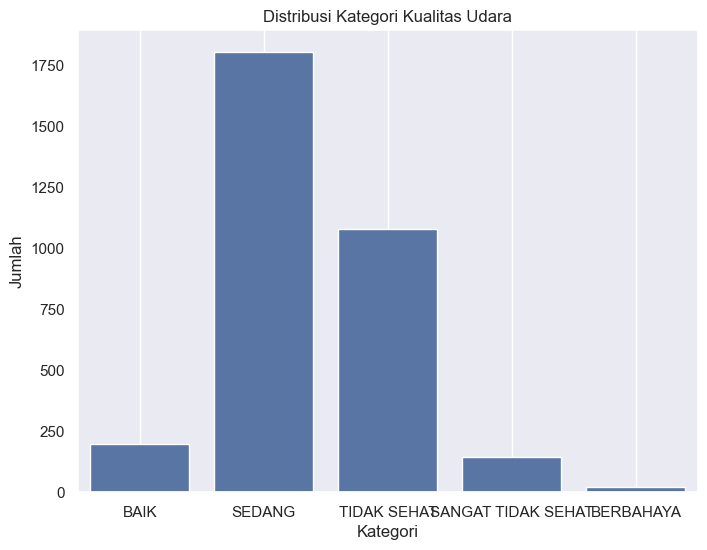

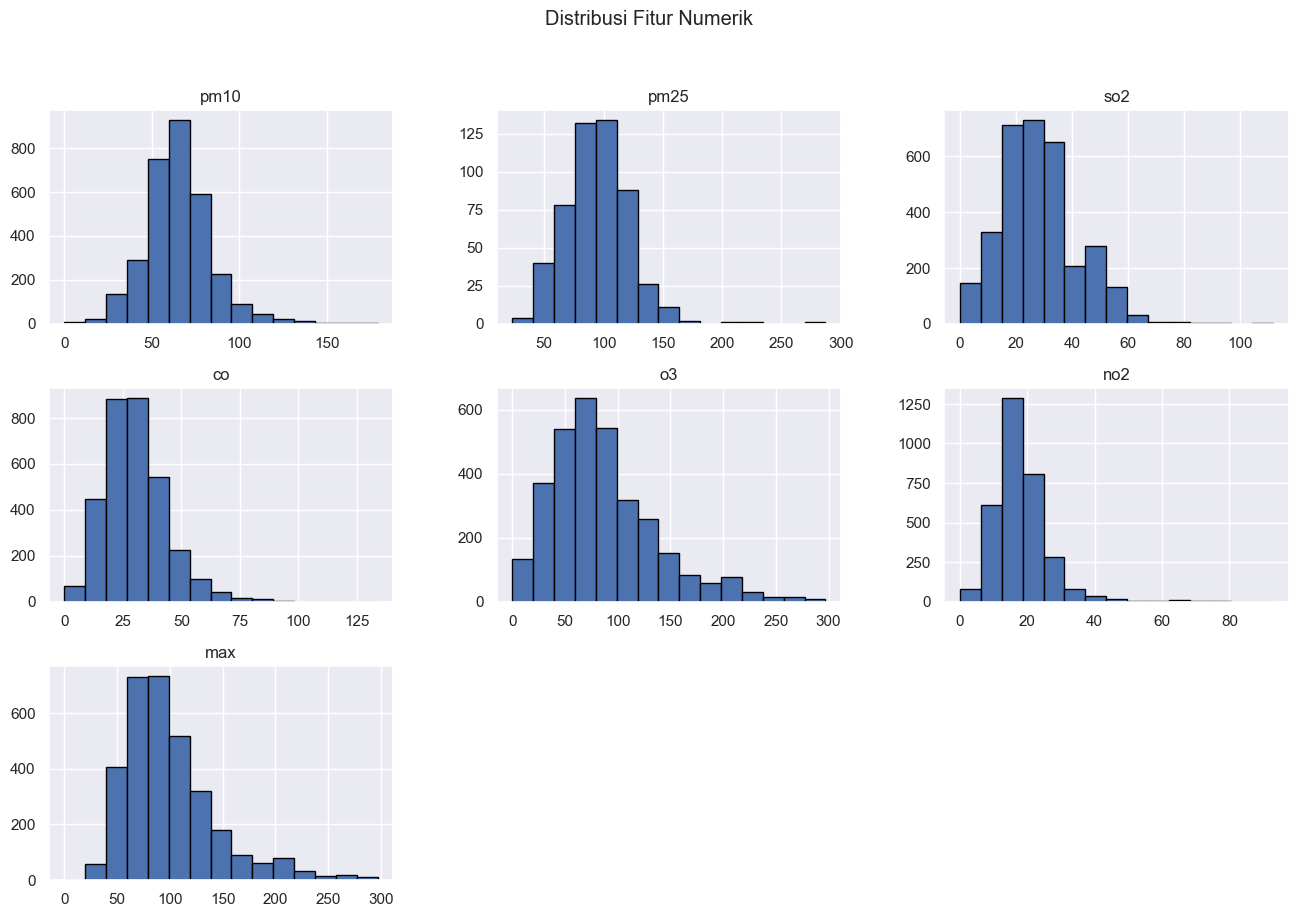

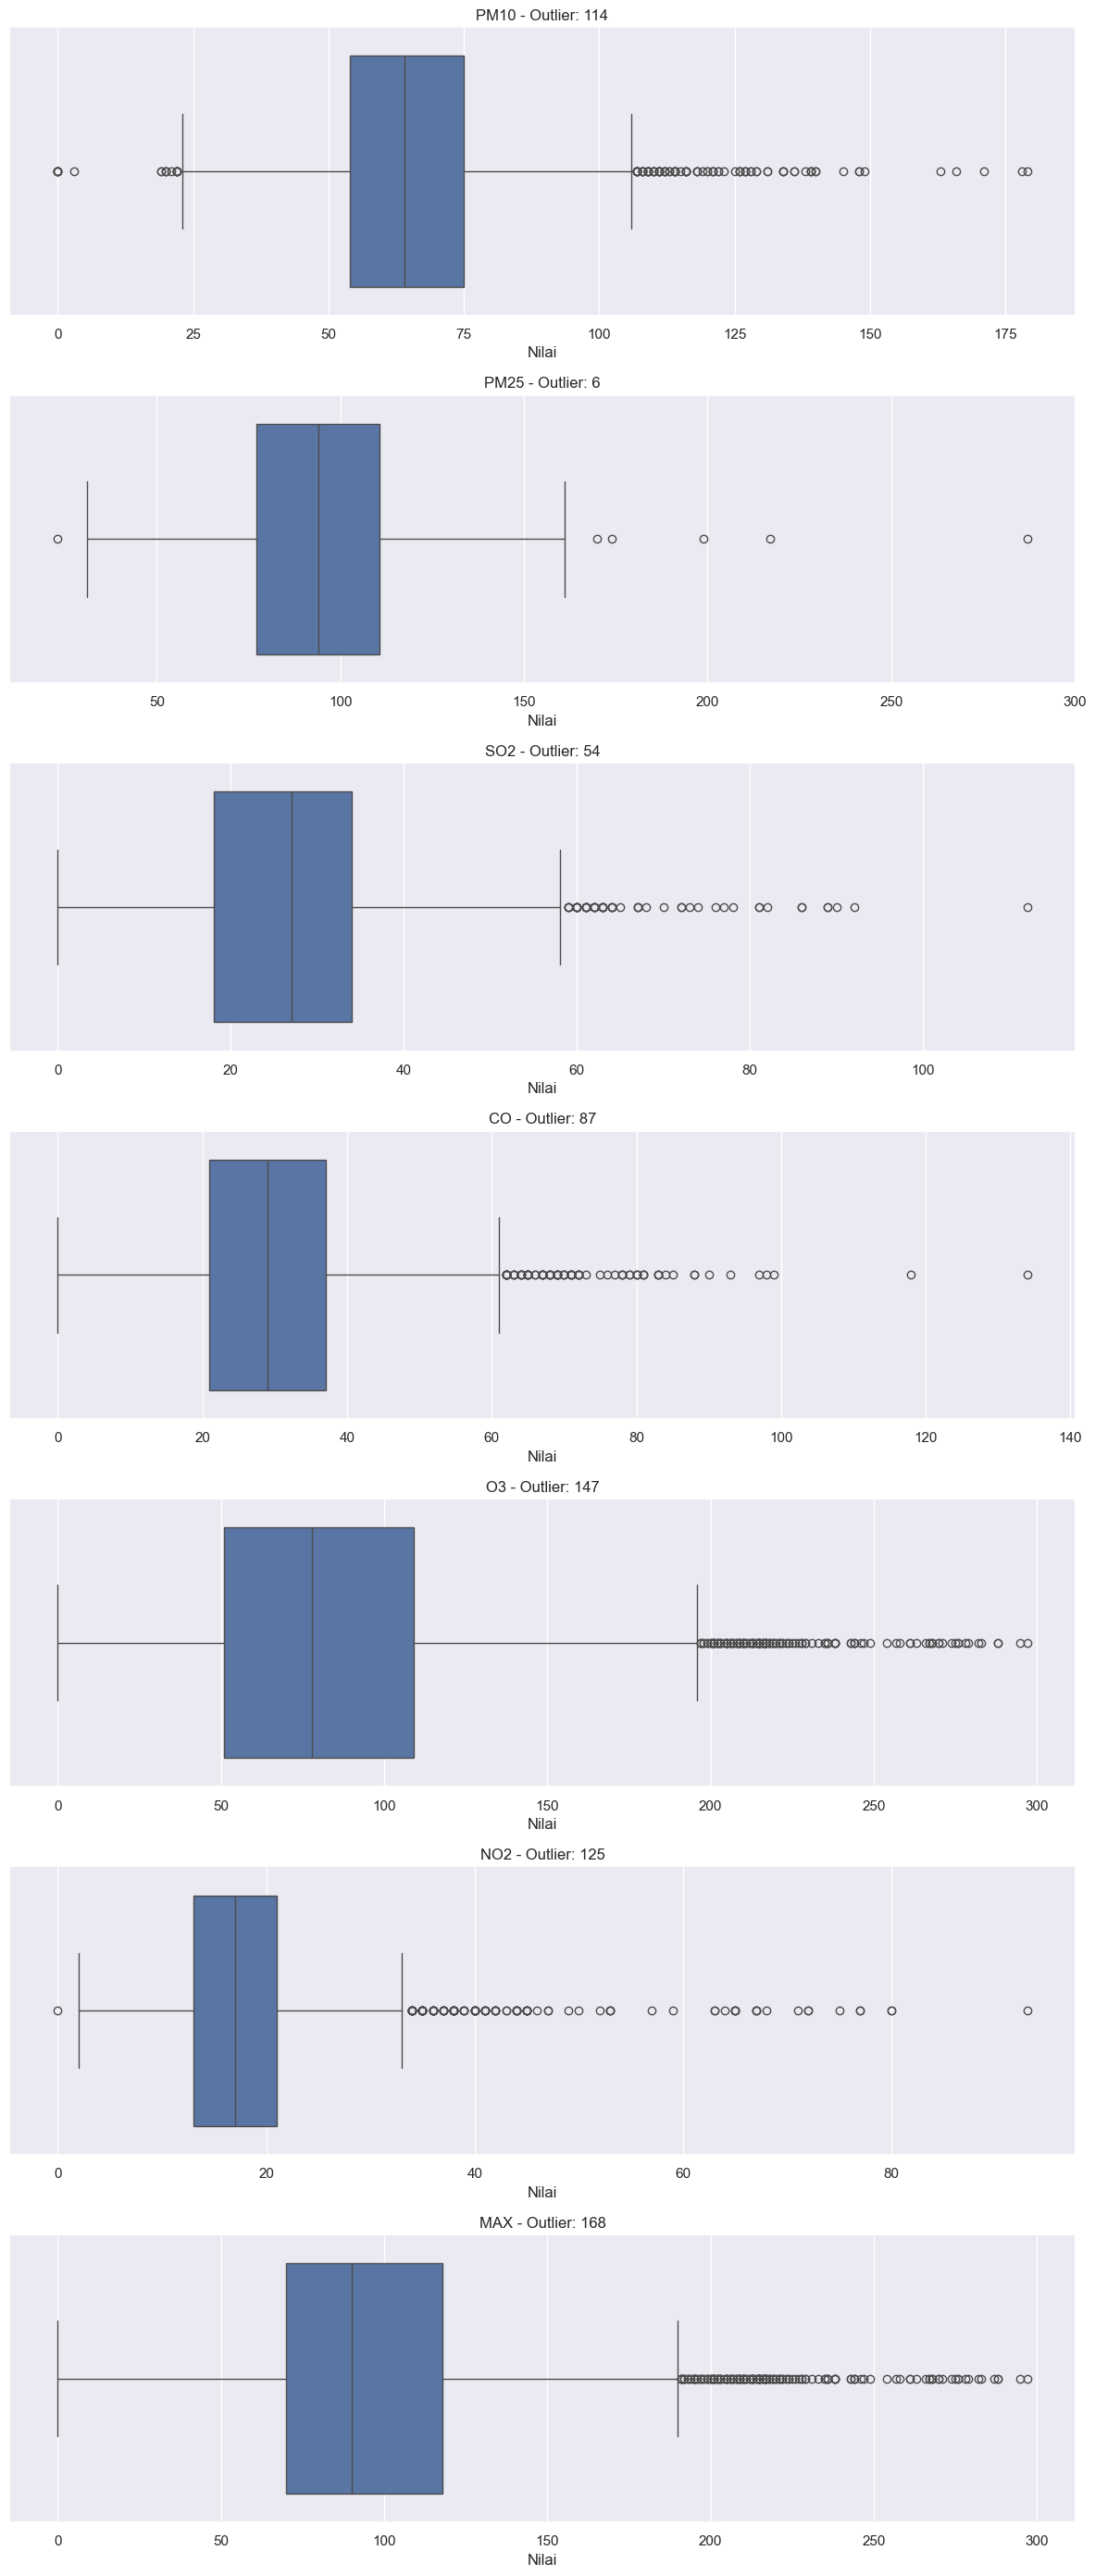

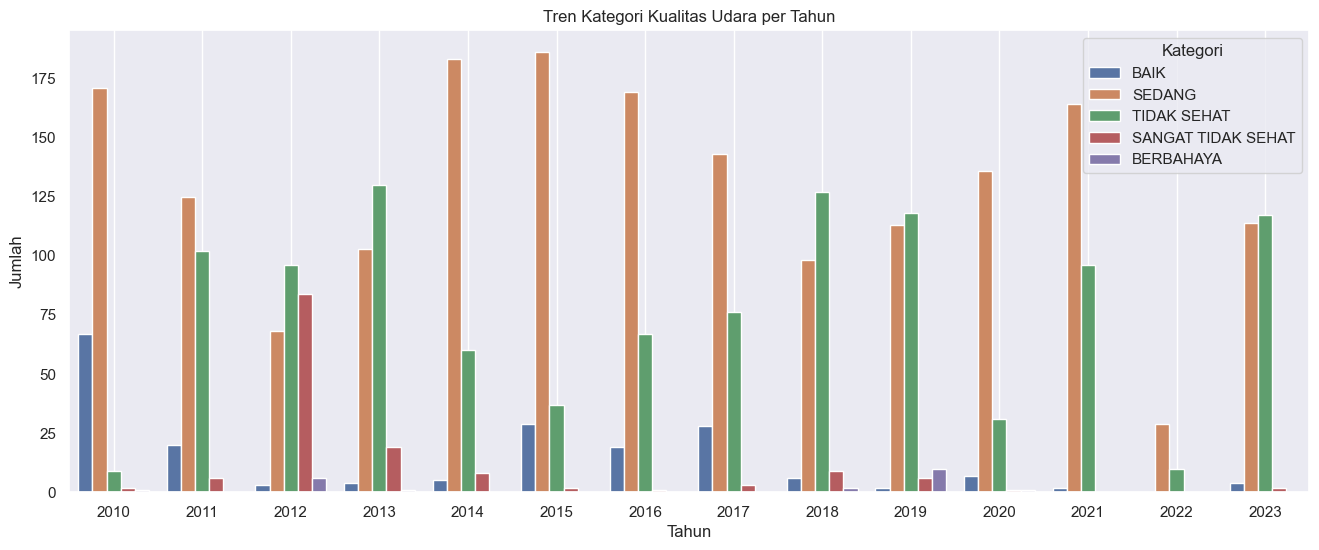

Jumlah duplikasi data: 0
          Total    Percent
critical      1   0.030883
o3            5   0.154416
co            5   0.154416
no2           7   0.216183
so2          12   0.370599
pm10        114   3.520692
pm25       2720  84.002471


In [91]:
air = pd.read_csv("air_quality_train.csv")

air.info()

plt.figure(figsize=(8, 6))
sns.countplot(data=air, x='category')
plt.title('Distribusi Kategori Kualitas Udara')
plt.xlabel('Kategori')
plt.ylabel('Jumlah')
plt.grid()
plt.show()

air.hist(bins=15, figsize=(16, 10), edgecolor='black')
plt.suptitle('Distribusi Fitur Numerik')
plt.show()

numeric_features = ['pm10', 'pm25', 'so2', 'co', 'o3', 'no2', 'max']
fig, axes = plt.subplots(len(numeric_features), 1, figsize=(12, 4*len(numeric_features)))
for i, column in enumerate(numeric_features):
    sns.boxplot(x=air[column], ax=axes[i])
    num_outliers = count_outliers(air[column].dropna())
    axes[i].set_title(f'{column.upper()} - Outlier: {num_outliers}')
    axes[i].set_xlabel('Nilai')
plt.tight_layout()
plt.show()

air['date'] = pd.to_datetime(air['date'])
air['year'] = air['date'].dt.year
air['month'] = air['date'].dt.month
plt.figure(figsize=(16, 6))
sns.countplot(data=air, x='year', hue='category')
plt.title('Tren Kategori Kualitas Udara per Tahun')
plt.xlabel('Tahun')
plt.ylabel('Jumlah')
plt.legend(title='Kategori')
plt.grid()
plt.show()

print("Jumlah duplikasi data: " + str(air.duplicated().sum()))
cek_null(air)

#### Preprocessing

In [92]:
air = air.drop(columns='pm25')
air = air.drop(columns='date')
air = air[air['critical'] != 'PM25']

In [110]:
air_to_predict = pd.read_csv("air_quality_test.csv")
air_to_predict = air_to_predict.drop(columns='pm25')
air_to_predict = air_to_predict.drop(columns='date')
air_to_predict = air_to_predict[air_to_predict['critical'] != 'PM25']

In [94]:
median_values = air[['pm10', 'so2', 'co', 'o3', 'no2']].median()
air[['pm10', 'so2', 'co', 'o3', 'no2']] = air[['pm10', 'so2', 'co', 'o3', 'no2']].fillna(median_values)

modus_critical = air['critical'].mode()[0]
air['critical'] = air['critical'].fillna(modus_critical)

In [111]:
median_values = air_to_predict[['pm10', 'so2', 'co', 'o3', 'no2']].median()
air_to_predict[['pm10', 'so2', 'co', 'o3', 'no2']] = air_to_predict[['pm10', 'so2', 'co', 'o3', 'no2']].fillna(median_values)

modus_critical = air_to_predict['critical'].mode()[0]
air_to_predict['critical'] = air_to_predict['critical'].fillna(modus_critical)

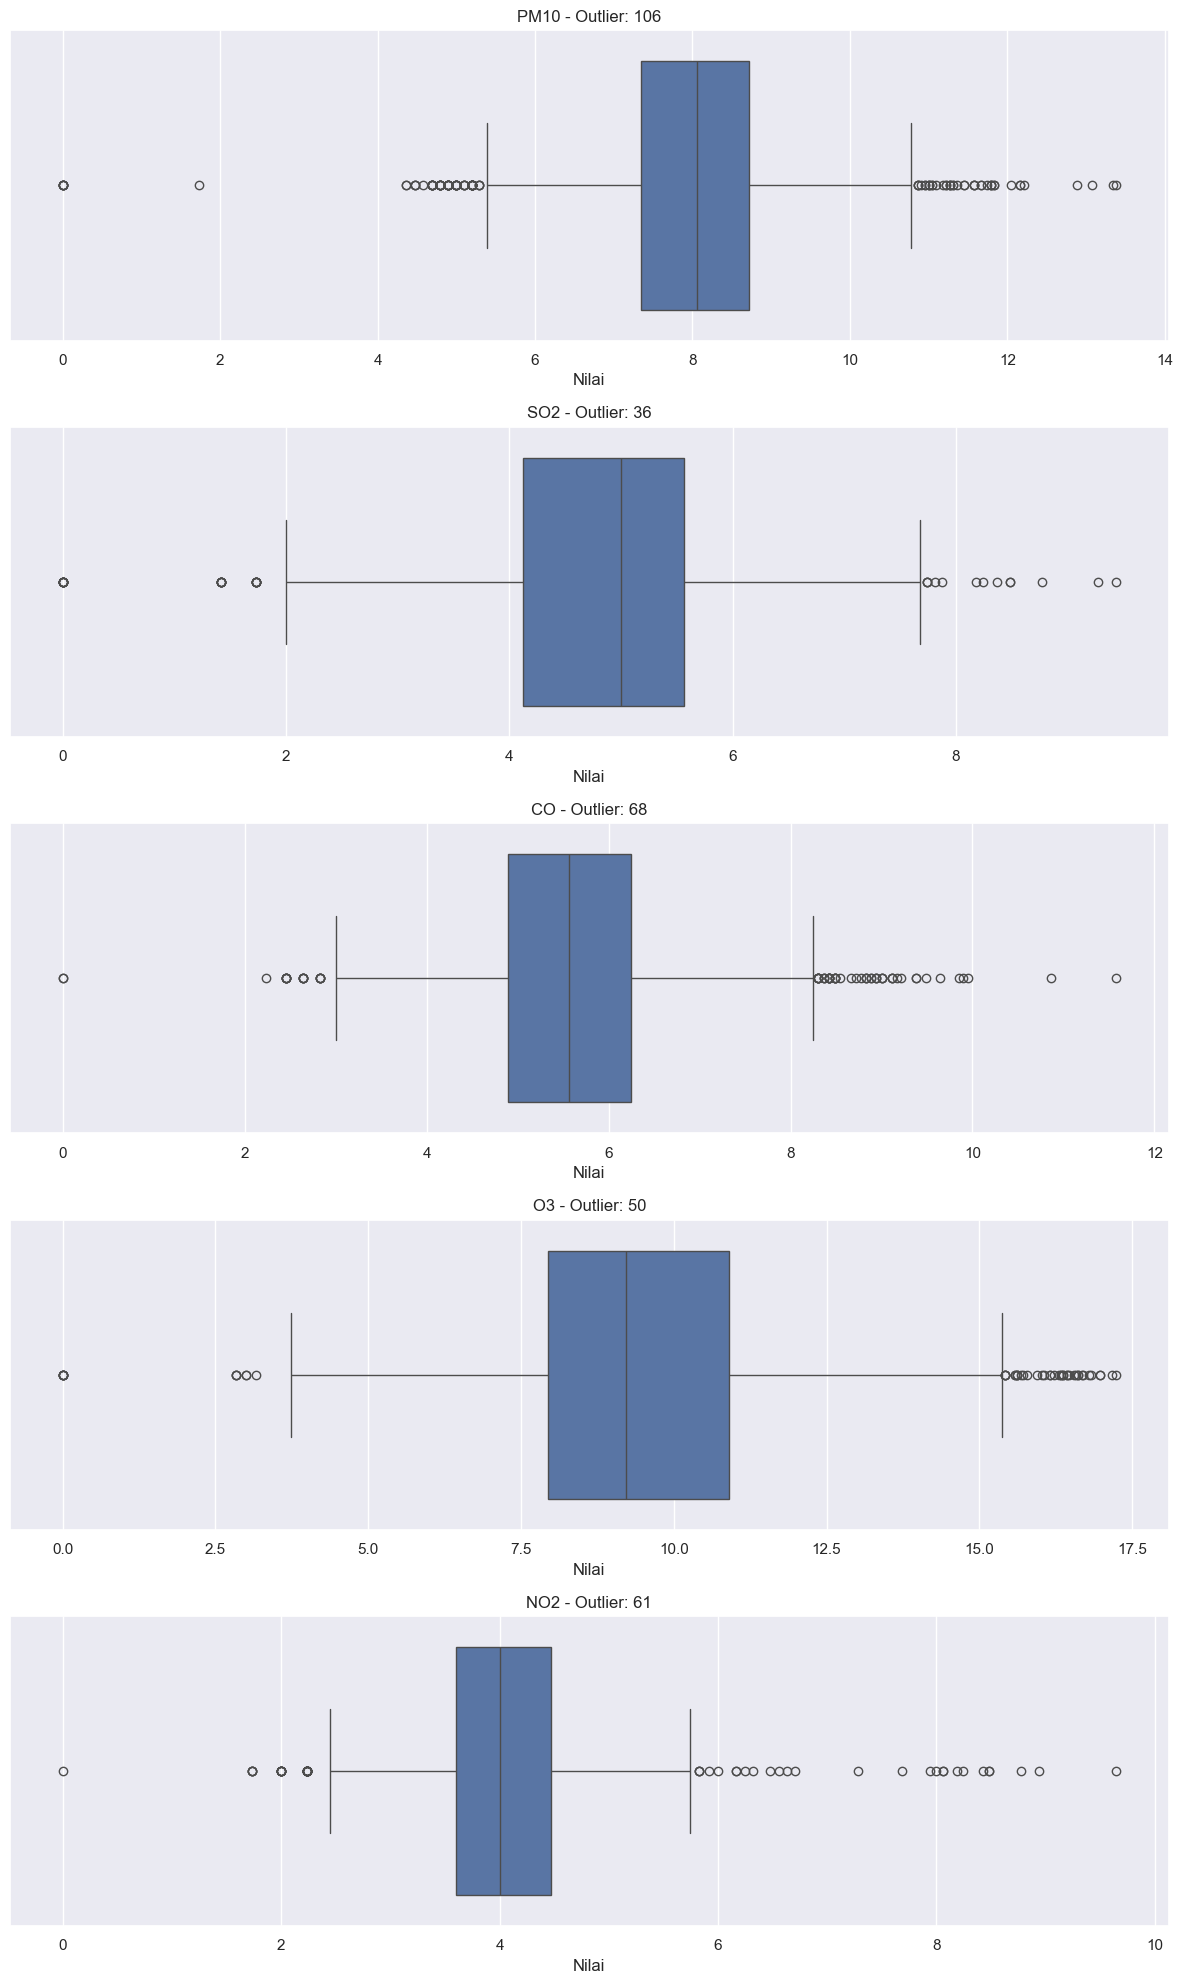

In [95]:
numeric_features= ['pm10', 'so2', 'co', 'o3', 'no2']

for col in numeric_features:
    air[col] = np.sqrt(air[col])

fig, axes = plt.subplots(len(numeric_features), 1, figsize=(12, 4*len(numeric_features)))
for i, column in enumerate(numeric_features):
    sns.boxplot(x=air[column], ax=axes[i])
    num_outliers = count_outliers(air[column].dropna())
    axes[i].set_title(f'{column.upper()} - Outlier: {num_outliers}')
    axes[i].set_xlabel('Nilai')
plt.tight_layout()
plt.show()

In [112]:
for col in numeric_features:
    air_to_predict[col] = np.sqrt(air_to_predict[col])

In [97]:
def target_encode2(train_df, test_df, categorical_cols, target_col, k_folds=5, alpha=5, replace_original=True):
    """
    Perform target encoding on categorical features with k-fold cross-validation.

    Parameters:
    -----------
    train_df : DataFrame
        Training data
    test_df : DataFrame
        Test data
    categorical_cols : list
        List of categorical column names
    target_col : str
        Name of the target column
    k_folds : int
        Number of folds for cross-validation
    alpha : int
        Smoothing parameter
    replace_original : bool
        If True, replace original categorical columns with encoded values

    Returns:
    --------
    train_encoded : DataFrame
        Training data with encoded features
    test_encoded : DataFrame
        Test data with encoded features
    """
    # Create copies of the dataframes
    train_encoded = train_df.copy()
    test_encoded = test_df.copy() if test_df is not None else None

    # Global means for each category
    global_means = {}
    for col in categorical_cols:
        global_means[col] = train_df.groupby(col)[target_col].mean().to_dict()

    # Target encode the test set using global means
    if test_encoded is not None:
        for col in categorical_cols:
            # Create a mapping for the test set
            mapping = test_encoded[col].map(global_means[col])
            # Handle unknown categories by using the global mean
            global_target_mean = train_df[target_col].mean()
            mapping = mapping.fillna(global_target_mean)

            if replace_original:
                # Replace original column with encoded values
                test_encoded[col] = mapping
            else:
                # Create a new column for encoded values
                test_encoded[col + '_target_encoded'] = mapping

    # Prepare for k-fold encoding of training data
    kf = KFold(n_splits=k_folds, shuffle=True, random_state=42)

    # Target encode the train set using k-fold cross-validation
    for col in categorical_cols:
        # Create a temporary column for the encoded values
        temp_col = col + '_temp_encoded'
        train_encoded[temp_col] = np.nan

        # For each fold
        for train_idx, val_idx in kf.split(train_df):
            # Get out-of-fold data
            oof_train = train_df.iloc[train_idx]

            # Calculate out-of-fold means
            oof_means = oof_train.groupby(col)[target_col].agg(['mean', 'count']).reset_index()

            # Apply smoothed means to validation fold
            for _, row in oof_means.iterrows():
                category_value = row[col]
                category_mean = row['mean']
                category_count = row['count']

                # Apply smoothing
                global_mean = train_df[target_col].mean()
                smoothed_mean = (category_mean * category_count + global_mean * alpha) / (category_count + alpha)

                # Update the validation fold for this category
                # The key fix: use train_encoded.iloc instead of loc to avoid index issues
                mask = train_df.iloc[val_idx][col] == category_value
                val_indices = val_idx[mask]
                if len(val_indices) > 0:
                    train_encoded.iloc[val_indices, train_encoded.columns.get_loc(temp_col)] = smoothed_mean

        # For any missing categories in the validation folds, use the global mean
        train_encoded[temp_col] = train_encoded[temp_col].fillna(train_df[target_col].mean())

        if replace_original:
            # Replace original column with encoded values
            train_encoded[col] = train_encoded[temp_col]
            # Drop temporary column
            train_encoded = train_encoded.drop(temp_col, axis=1)
        else:
            # Rename temporary column to final encoded column name
            train_encoded = train_encoded.rename(columns={temp_col: col + '_target_encoded'})

    return train_encoded, test_encoded

In [113]:
category_mapping = {'BAIK': 0, 'SEDANG': 1, 'TIDAK SEHAT': 2, 'SANGAT TIDAK SEHAT': 3, 'BERBAHAYA': 4}
air['category'] = air['category'].map(category_mapping)

categorical_columns = ['station', 'critical']
air_encoded, air_to_predict_encoded = target_encode2(air, air_to_predict, categorical_columns, 'category')

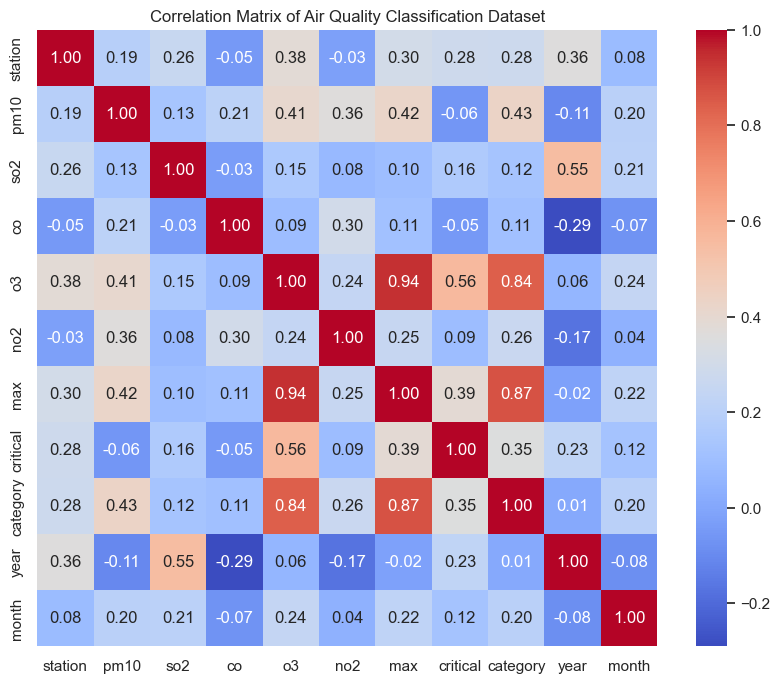

In [99]:
plt.figure(figsize=(10, 8))
sns.heatmap(air_encoded.corr(method='pearson'), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Air Quality Classification Dataset')
plt.show()

#### Modeling

In [104]:
air_X_raw = air_encoded.drop(["category"], axis=1)
air_y = air_encoded["category"]

air_X_raw = air_X_raw.drop(columns='month')
air_X_raw = air_X_raw.drop(columns='year')

selector = SelectKBest(f_classif, k=1)
air_X = selector.fit_transform(air_X_raw, air_y)

air_X_train, air_X_test, air_y_train, air_y_test = train_test_split(air_X, air_y, test_size=0.2, stratify=air_y, random_state=2025)

scaler = MinMaxScaler()

air_X_train_scaled = scaler.fit_transform(air_X_train)
air_X_test_scaled = scaler.transform(air_X_test)

model = KNeighborsClassifier()

tunned_params = {
	'n_neighbors': list(range(1, 21)),
	'metric': ['euclidean', 'manhattan', 'jaccard']
}

print("Tuning hyperparameters model KNN\n")

kfold = KFold(n_splits=5, shuffle=True, random_state=42)
clfKNN = GridSearchCV(
	model,
	tunned_params,
	scoring="accuracy",
	cv=kfold,
	verbose=2
)

clfKNN.fit(air_X_train_scaled, air_y_train)

Tuning hyperparameters model KNN

Fitting 5 folds for each of 60 candidates, totalling 300 fits
[CV] END ....................metric=euclidean, n_neighbors=1; total time=   0.0s
[CV] END ....................metric=euclidean, n_neighbors=1; total time=   0.0s
[CV] END ....................metric=euclidean, n_neighbors=1; total time=   0.0s
[CV] END ....................metric=euclidean, n_neighbors=1; total time=   0.0s
[CV] END ....................metric=euclidean, n_neighbors=1; total time=   0.0s
[CV] END ....................metric=euclidean, n_neighbors=2; total time=   0.0s
[CV] END ....................metric=euclidean, n_neighbors=2; total time=   0.0s
[CV] END ....................metric=euclidean, n_neighbors=2; total time=   0.0s
[CV] END ....................metric=euclidean, n_neighbors=2; total time=   0.0s
[CV] END ....................metric=euclidean, n_neighbors=2; total time=   0.0s
[CV] END ....................metric=euclidean, n_neighbors=3; total time=   0.0s
[CV] END ....

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan', 'jaccard'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20]},
             scoring='accuracy', verbose=2)

In [105]:
print("Best parameters set found on development set:")
print(clfKNN.best_params_)

Best parameters set found on development set:
{'metric': 'euclidean', 'n_neighbors': 5}


In [106]:
KNN_manhattan_transaction = KNeighborsClassifier(n_neighbors=5, metric='manhattan')
KNN_manhattan_transaction.fit(air_X_train_scaled, air_y_train)

scores = cross_val_score(KNN_manhattan_transaction, air_X_train_scaled, air_y_train, scoring='accuracy', cv=kfold)
print(f'Hasil Evaluasi cross validation: {scores.mean()}')

air_y_pred = KNN_manhattan_transaction.predict(air_X_test_scaled)
print("Hasil prediksi:", air_y_pred)

evaluate_classifier_performance(air_y_pred, air_y_test)

Hasil Evaluasi cross validation: 0.9868418882704597
Hasil prediksi: [2 1 1 1 2 1 1 1 1 1 1 1 2 1 2 1 2 0 1 1 1 1 3 1 1 1 1 1 1 2 1 2 1 2 1 2 1
 2 1 3 1 1 1 1 1 2 1 1 1 2 1 2 2 2 2 1 1 1 0 1 2 1 2 2 1 2 2 2 1 1 3 2 1 1
 2 2 2 1 1 2 1 3 2 0 1 2 1 1 2 1 3 1 2 2 1 2 3 2 2 2 0 3 3 2 1 1 0 2 1 0 2
 0 2 2 2 1 2 1 3 1 2 2 1 1 1 2 0 0 2 2 2 1 0 2 2 2 2 1 1 1 1 1 0 1 1 2 3 1
 2 1 1 3 2 2 3 1 2 1 0 2 1 1 1 2 2 1 1 1 2 1 2 2 2 2 1 2 1 2 1 2 2 1 1 1 1
 1 1 1 1 1 2 2 1 0 1 2 2 0 1 2 0 1 1 1 2 1 3 1 2 1 2 2 1 2 3 0 2 1 1 1 1 1
 1 1 1 2 2 1 1 1 0 1 1 2 2 1 1 1 1 1 1 1 1 2 1 1 2 1 2 1 2 1 2 1 2 2 2 1 1
 1 0 1 3 1 2 1 1 2 1 2 1 2 1 1 1 1 1 1 2 1 1 1 1 2 2 1 1 2 1 1 2 1 1 1 1 2
 1 3 1 0 2 1 2 2 2 2 1 0 2 2 2 1 1 1 3 1 1 2 1 1 2 1 1 1 1 1 2 2 1 2 1 1 1
 1 1 1 1 2 1 3 1 1 1 1 2 2 1 2 1 1 1 1 0 0 1 1 1 1 0 2 2 2 1 1 3 2 1 2 1 1
 1 2 1 1 2 2 2 2 1 0 1 2 1 1 0 1 1 1 3 1 1 1 1 2 2 1 1 2 1 1 1 1 2 2 1 2 2
 1 2 1 1 1 1 1 3 2 1 3 2 1 2 1 1 1 1 1 1 1 2 1 2 0 1 2 1 2 2 1 0 2 3 1 1 1
 1 2 1 1 1 0 1 1 1 1 2 0 3 1 0 2

prediction,0,1,2,3
actual,,,,
0,39,0,0,0
1,0,307,0,0
2,0,0,173,0
3,0,0,3,25
4,0,0,2,2



Butuh informasi lebih lengkap? Silakan simak di bawah ini:
Accuracy: 0.9872958257713249
F1 Macro Average: 0.7789691789691789
F1 Micro Average: 0.9872958257713249
Precision Macro Average: 0.7795672076570953
Precision Micro Average: 0.9872958257713249
Recall Macro Average: 0.7785714285714286
Recall Micro Average: 0.9872958257713249


In [ ]:
air_to_predict_X = selector.transform(air_to_predict_encoded)

air_X_test_scaled = scaler.transform(air_to_predict_X)
air_y_kaggle_pred = KNN_manhattan_transaction.predict(air_X_test_scaled)

air_predict = pd.read_csv("air_quality_test.csv")
dates = air_predict['date']

reverse_category_mapping = {0: 'BAIK', 1: 'SEDANG', 2: 'TIDAK SEHAT', 3: 'SANGAT TIDAK SEHAT', 4: 'BERBAHAYA'}

predicted_categories = []

pred_index = 0

for i, row in air_predict.iterrows():
    if row['critical'] == 'PM25':
        predicted_categories.append('')
    else:
        predicted_categories.append(reverse_category_mapping[air_y_kaggle_pred[pred_index]])
        pred_index += 1

result_df = pd.DataFrame({
    'date': dates,
    'category': predicted_categories
})

result_df.to_csv('result.csv', index=False)